In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install required libraries
!pip install transformers

import os
from transformers import BertTokenizer, BertModel
import torch


drive_folder_path = "/content/drive/MyDrive/Datasetr/Dataset/Transcripts"

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

def process_transcripts_from_drive(folder_path):
    embeddings = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):  # Only process .txt files
            file_path = os.path.join(folder_path, filename)

            # Read the transcript file
            with open(file_path, 'r') as file:
                text = file.read()

            # Tokenize the input text
            inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

            # Pass through the BERT model
            outputs = model(**inputs)

            # Get the CLS token embedding
            cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()

            # Store embedding
            embeddings[filename] = cls_embedding

    return embeddings

embeddings = process_transcripts_from_drive(drive_folder_path)

import numpy as np
output_path = "/content/drive/My Drive/Datasetr/Transcript_Embeddings"
os.makedirs(output_path, exist_ok=True)

for filename, embedding in embeddings.items():
    output_file = os.path.join(output_path, f"{filename}_embedding.npy")
    np.save(output_file, embedding)
    print(f"Saved embedding for {filename} at {output_file}")

# Display a summary of processed files
print(f"Processed {len(embeddings)} transcript files.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Saved embedding for Interview_3.txt at /content/drive/My Drive/Datasetr/Transcript_Embeddings/Interview_3.txt_embedding.npy
Saved embedding for Interview-4.txt at /content/drive/My Drive/Datasetr/Transcript_Embeddings/Interview-4.txt_embedding.npy
Saved embedding for Interview_5.txt at /content/drive/My Drive/Datasetr/Transcript_Embeddings/Interview_5.txt_embedding.npy
Saved embedding for Interview_6.txt at /content/drive/My Drive/Datasetr/Transcript_Embeddings/Interview_6.txt_embedding.npy
Saved embedding for Interview_7.txt at /content/drive/My Drive/Datasetr/Transcript_Embeddings/Interview_7.txt_embedding.npy
Saved embedding for Intervie_8.txt at /content/drive/My Drive/Datasetr/Transcript_Embeddings/Intervie_8.txt_embedding.npy
Saved embedding for Interview_9.txt at /content/drive/My Drive/Datasetr/Transcript_Embeddings/Interview_9.txt_embedding.npy
Saved embedding for Interview_10.txt at /content/drive/My Drive/Datasetr/Transcript_Embeddings/Interview_10.txt_embedding.npy
Saved em

In [ ]:
first_transcript = list(embeddings.keys())[0]  # Get the name of the first transcript
print(f"First Transcript Filename: {first_transcript}")

first_embedding = embeddings[first_transcript]
print(f"CLS Embedding for {first_transcript}:")
print(first_embedding)


First Transcript Filename: Interview_3.txt
CLS Embedding for Interview_3.txt:
[[-2.41819192e-02  5.78303039e-01  4.01939481e-01  9.44223851e-02
  -1.84452668e-01 -1.94180682e-01  6.04607761e-01  3.36643964e-01
  -2.11161137e-01 -1.93227991e-01  2.73785472e-01 -2.21114047e-02
  -4.46746230e-01 -3.53838712e-01  7.88701773e-02  4.06213671e-01
   4.91333395e-01  1.49719045e-01  1.17767841e-01  4.75778580e-01
  -8.23986903e-02 -2.01005414e-01  2.12919712e-01 -6.20466113e-01
   3.31414938e-01 -5.19405156e-02 -5.29772520e-01 -6.35249078e-01
   7.45044649e-02  3.03055011e-02 -8.13468620e-02  5.12773097e-01
   3.75925928e-01 -3.32848698e-01  8.67890894e-01 -6.55087054e-01
   3.83390993e-01 -6.26504302e-01  6.35022581e-01 -1.38802473e-02
  -2.14475110e-01  3.81983578e-01 -1.36386752e-01  4.31367308e-02
  -5.20961583e-02  3.51035237e-01 -3.58804798e+00 -1.91888720e-01
   3.38339955e-01 -5.30563369e-02  6.15303755e-01 -6.14602506e-01
   3.45052242e-01  5.09083152e-01  3.21294308e-01  3.20656262e-0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downlo

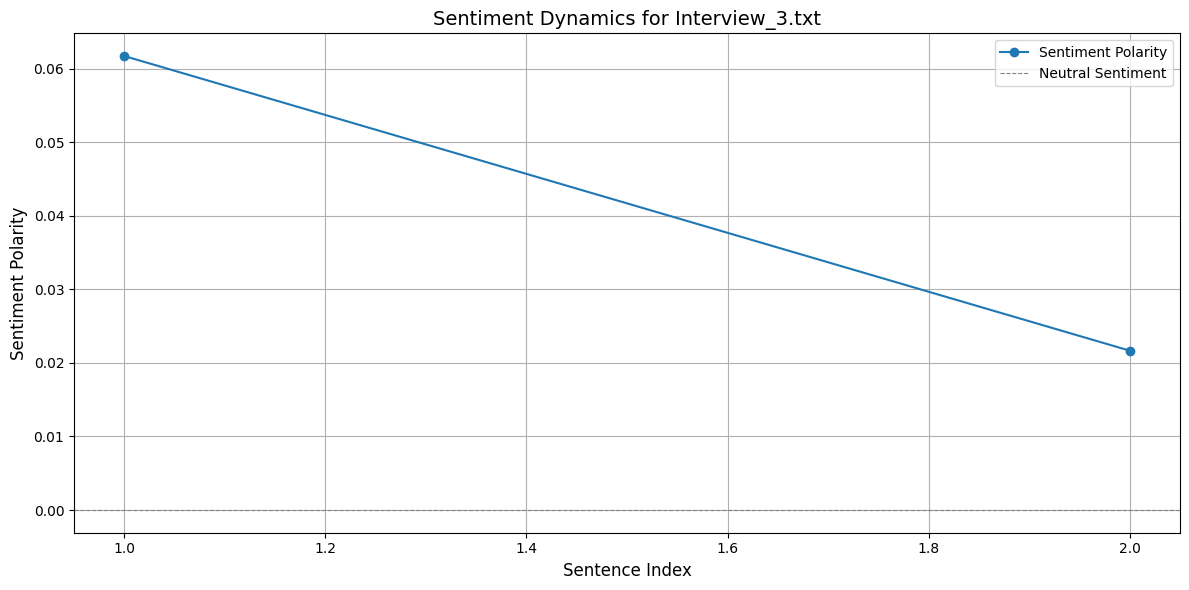

Sentiment dynamics plot saved for Interview_3.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview_3_sentiment_plot.png


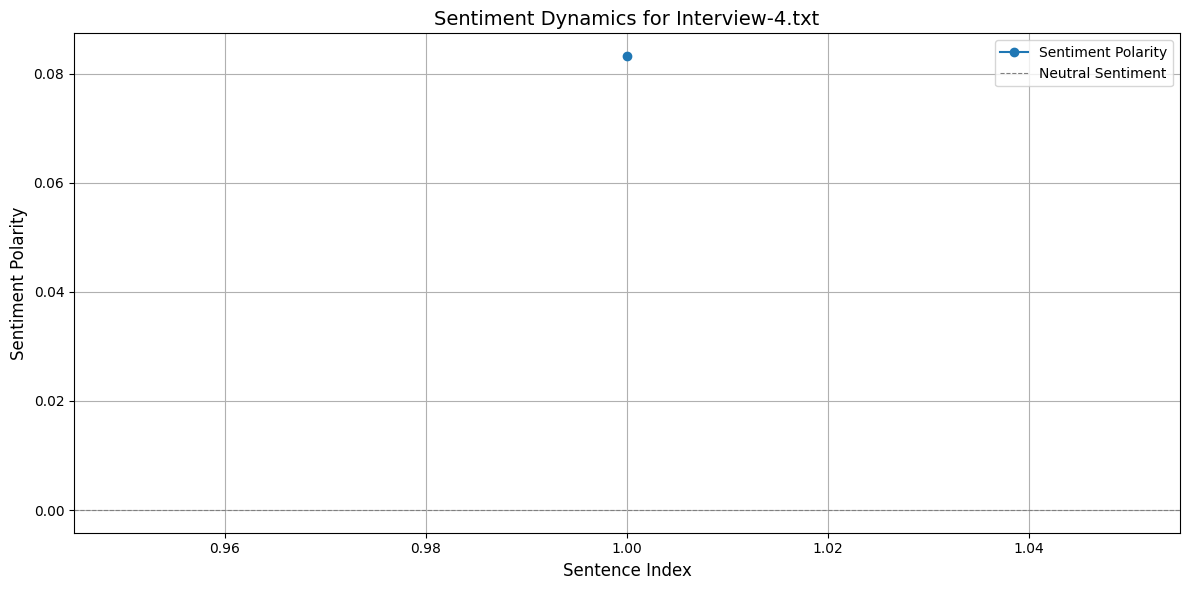

Sentiment dynamics plot saved for Interview-4.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview-4_sentiment_plot.png


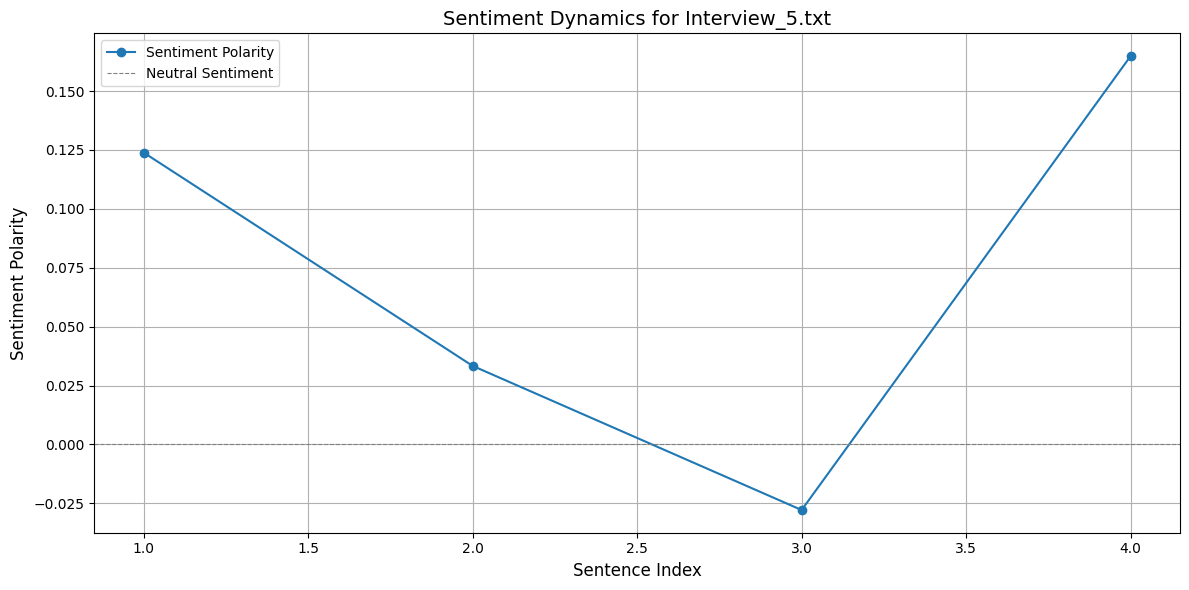

Sentiment dynamics plot saved for Interview_5.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview_5_sentiment_plot.png


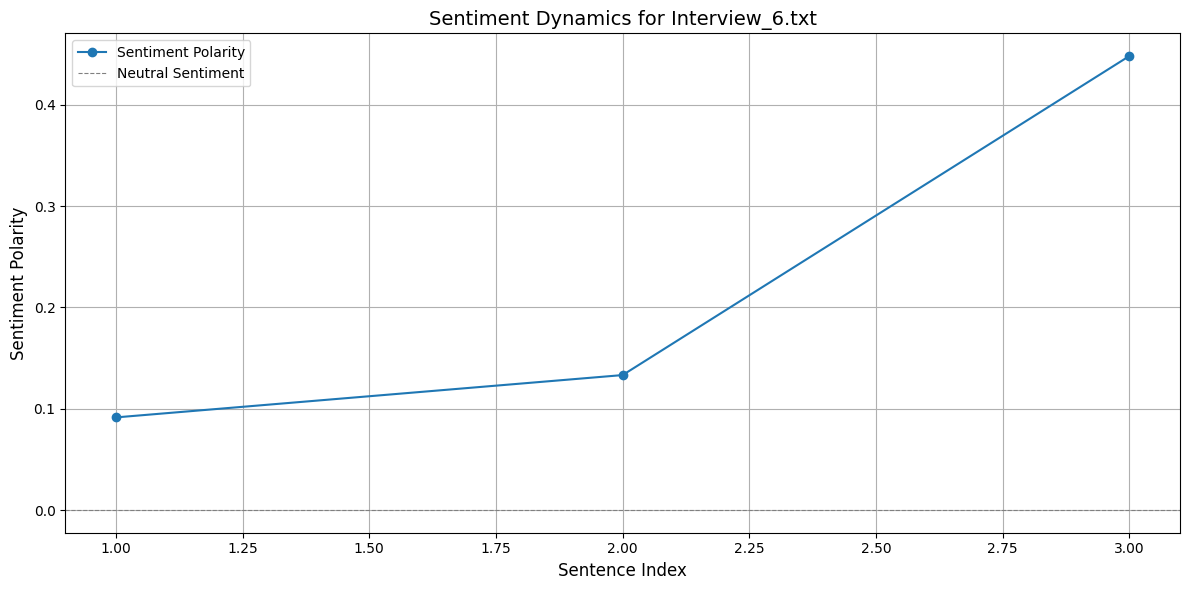

Sentiment dynamics plot saved for Interview_6.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview_6_sentiment_plot.png


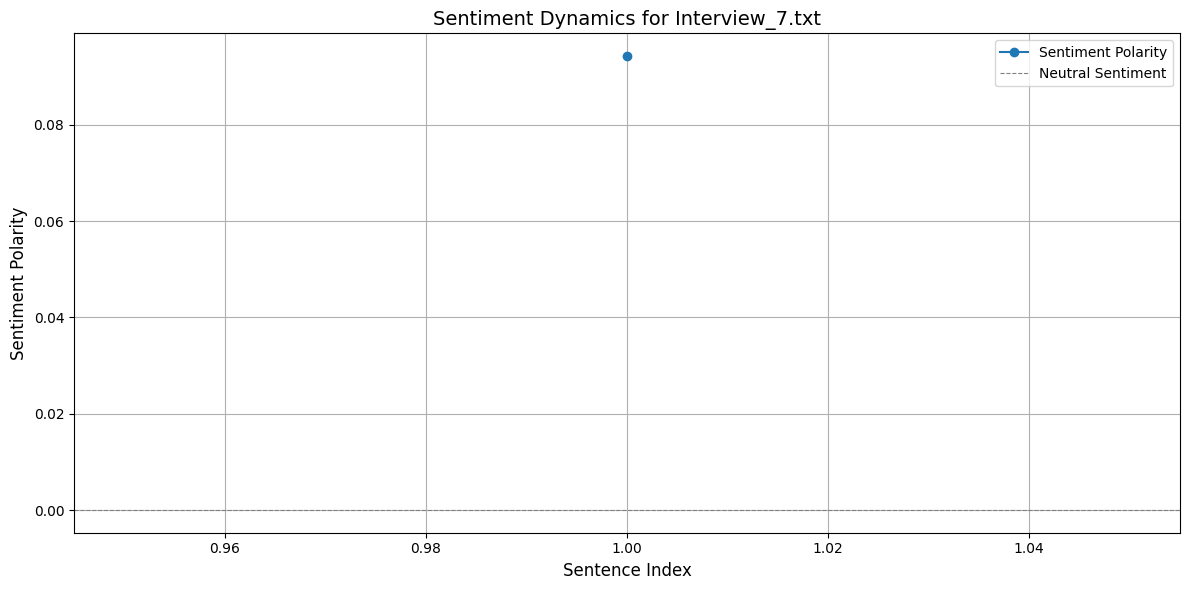

Sentiment dynamics plot saved for Interview_7.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview_7_sentiment_plot.png


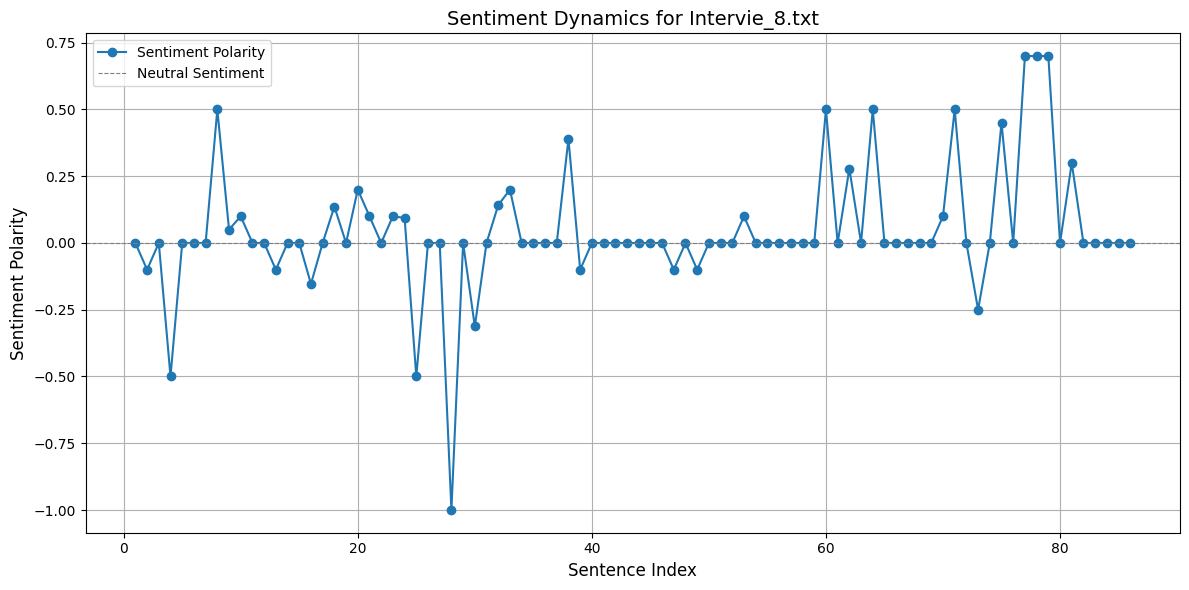

Sentiment dynamics plot saved for Intervie_8.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Intervie_8_sentiment_plot.png


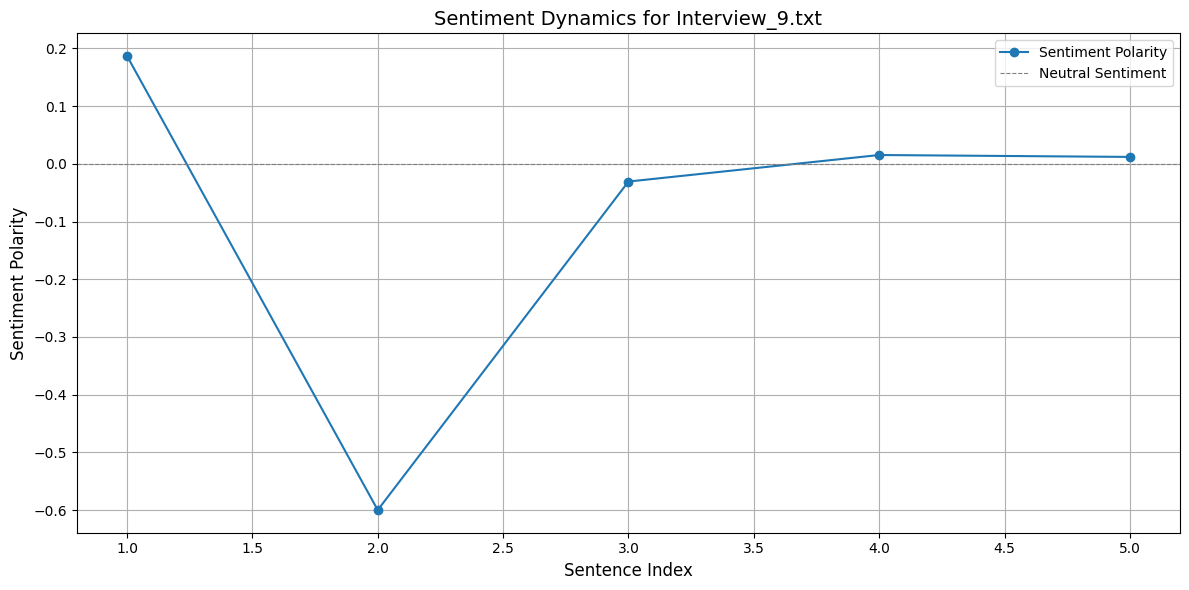

Sentiment dynamics plot saved for Interview_9.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview_9_sentiment_plot.png


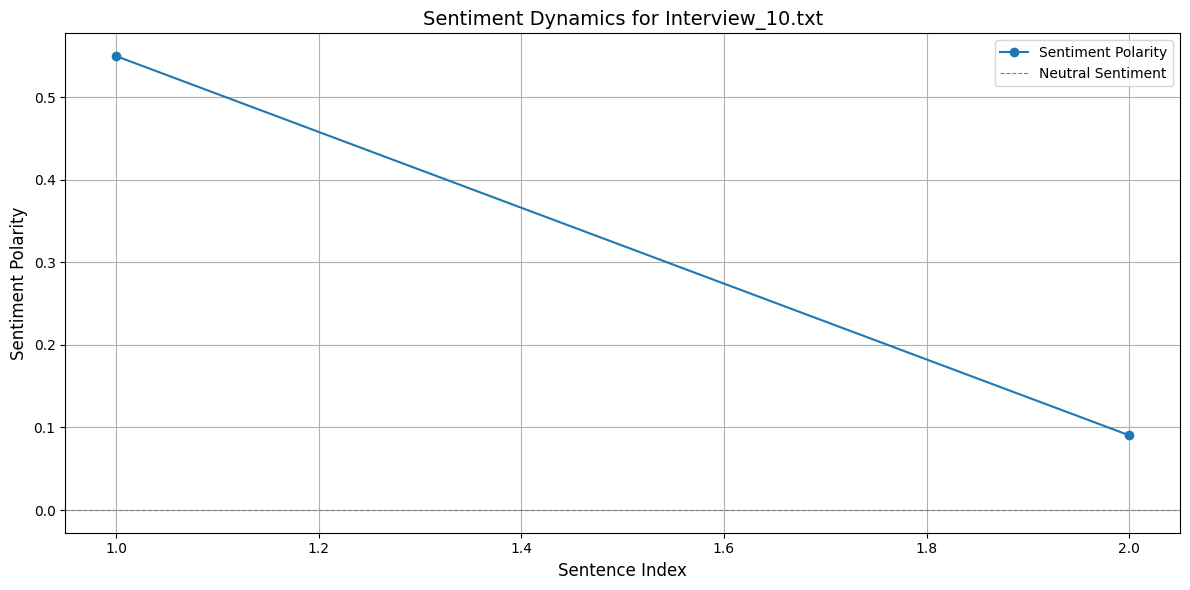

Sentiment dynamics plot saved for Interview_10.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview_10_sentiment_plot.png


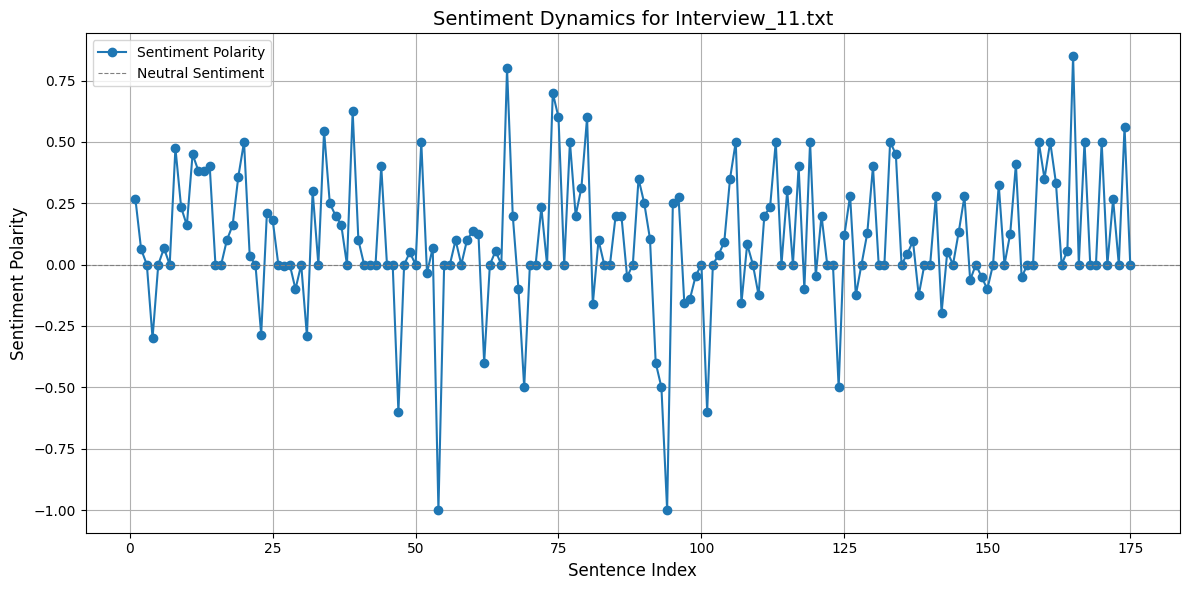

Sentiment dynamics plot saved for Interview_11.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview_11_sentiment_plot.png


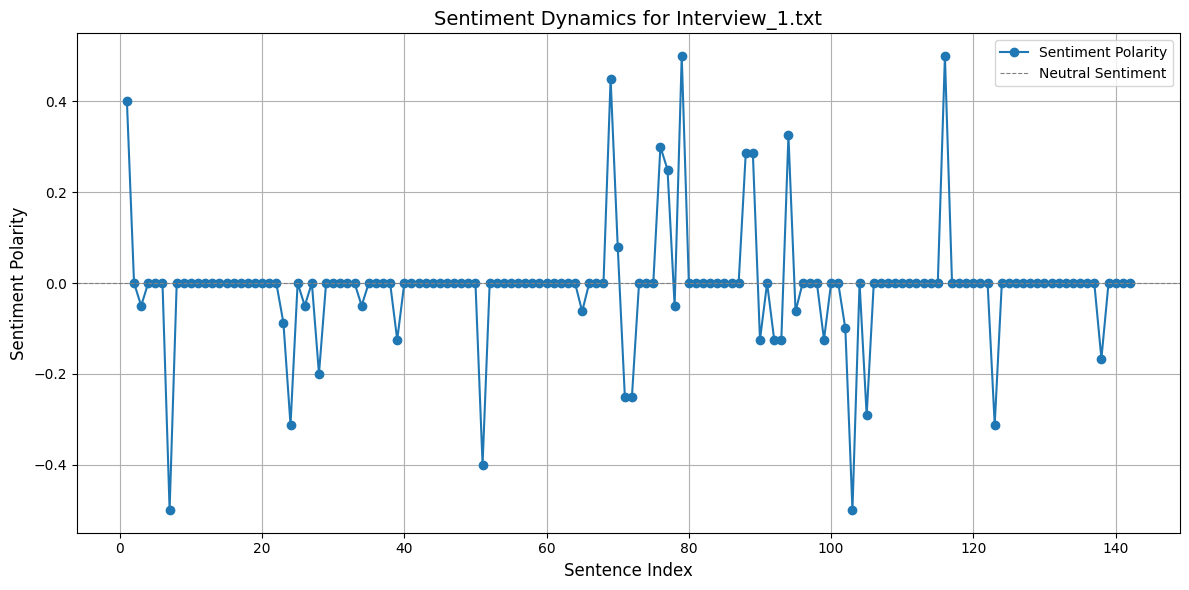

Sentiment dynamics plot saved for Interview_1.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview_1_sentiment_plot.png


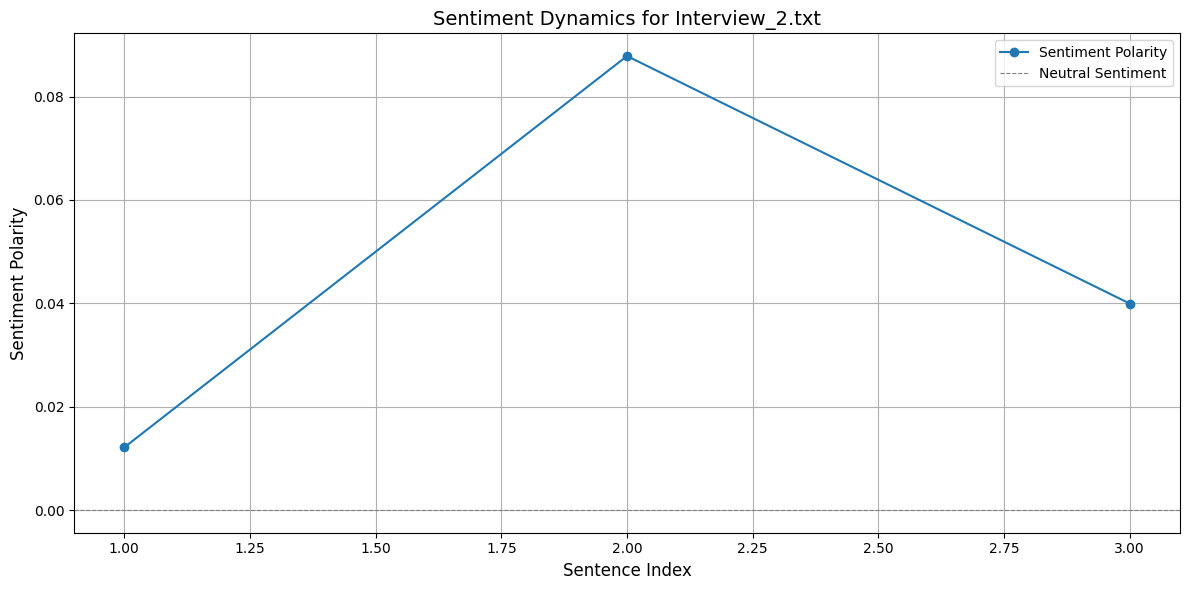

Sentiment dynamics plot saved for Interview_2.txt: /content/drive/MyDrive/Datasetr/processed_transcripts/Interview_2_sentiment_plot.png


In [ ]:
import os
import json
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
import nltk
import os
import nltk

# Ensure nltk data path is properly set
nltk.data.path.append('/root/nltk_data/')

# Delete existing 'punkt' if partially downloaded
punkt_path = '/root/nltk_data/tokenizers/punkt'
if os.path.exists(punkt_path):
    import shutil
    shutil.rmtree(punkt_path)

# Re-download punkt
nltk.download('punkt', download_dir='/root/nltk_data')
nltk.download('all', download_dir='/root/nltk_data')  # Ensures all dependencies are covered


# Directories
transcripts_dir = "/content/drive/MyDrive/Datasetr/Dataset/Transcripts/"
processed_transcripts_dir = "/content/drive/MyDrive/Datasetr/processed_transcripts/"
os.makedirs(processed_transcripts_dir, exist_ok=True)

# Process transcript and analyze sentiment dynamics
def analyze_sentiment_dynamics(transcript_path):
    with open(transcript_path, "r") as f:
        text = f.read()

    # Tokenize into sentences
    sentences = sent_tokenize(text)

    # Perform sentiment analysis on each sentence
    sentiment_polarities = [TextBlob(sentence).sentiment.polarity for sentence in sentences]

    return sentences, sentiment_polarities

# Plot sentiment dynamics for all transcripts
def plot_sentiment_dynamics(transcripts_dir):
    for transcript_file in os.listdir(transcripts_dir):
        if transcript_file.endswith(".txt"):
            transcript_path = os.path.join(transcripts_dir, transcript_file)

            # Analyze sentiment dynamics
            sentences, sentiment_polarities = analyze_sentiment_dynamics(transcript_path)

            # Plot sentiment polarity
            plt.figure(figsize=(12, 6))
            plt.plot(range(1, len(sentiment_polarities) + 1), sentiment_polarities, marker='o', label="Sentiment Polarity")
            plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Neutral Sentiment')
            plt.title(f"Sentiment Dynamics for {transcript_file}", fontsize=14)
            plt.xlabel("Sentence Index", fontsize=12)
            plt.ylabel("Sentiment Polarity", fontsize=12)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()

            # Save the plot as an image
            output_image_path = os.path.join(processed_transcripts_dir, f"{os.path.splitext(transcript_file)[0]}_sentiment_plot.png")
            plt.savefig(output_image_path)
            plt.show()

            print(f"Sentiment dynamics plot saved for {transcript_file}: {output_image_path}")

# Analyze and plot sentiment dynamics for all transcripts
plot_sentiment_dynamics(transcripts_dir)


In [ ]:
pip install librosa numpy pydub

Plotting features for Interview_1.json...


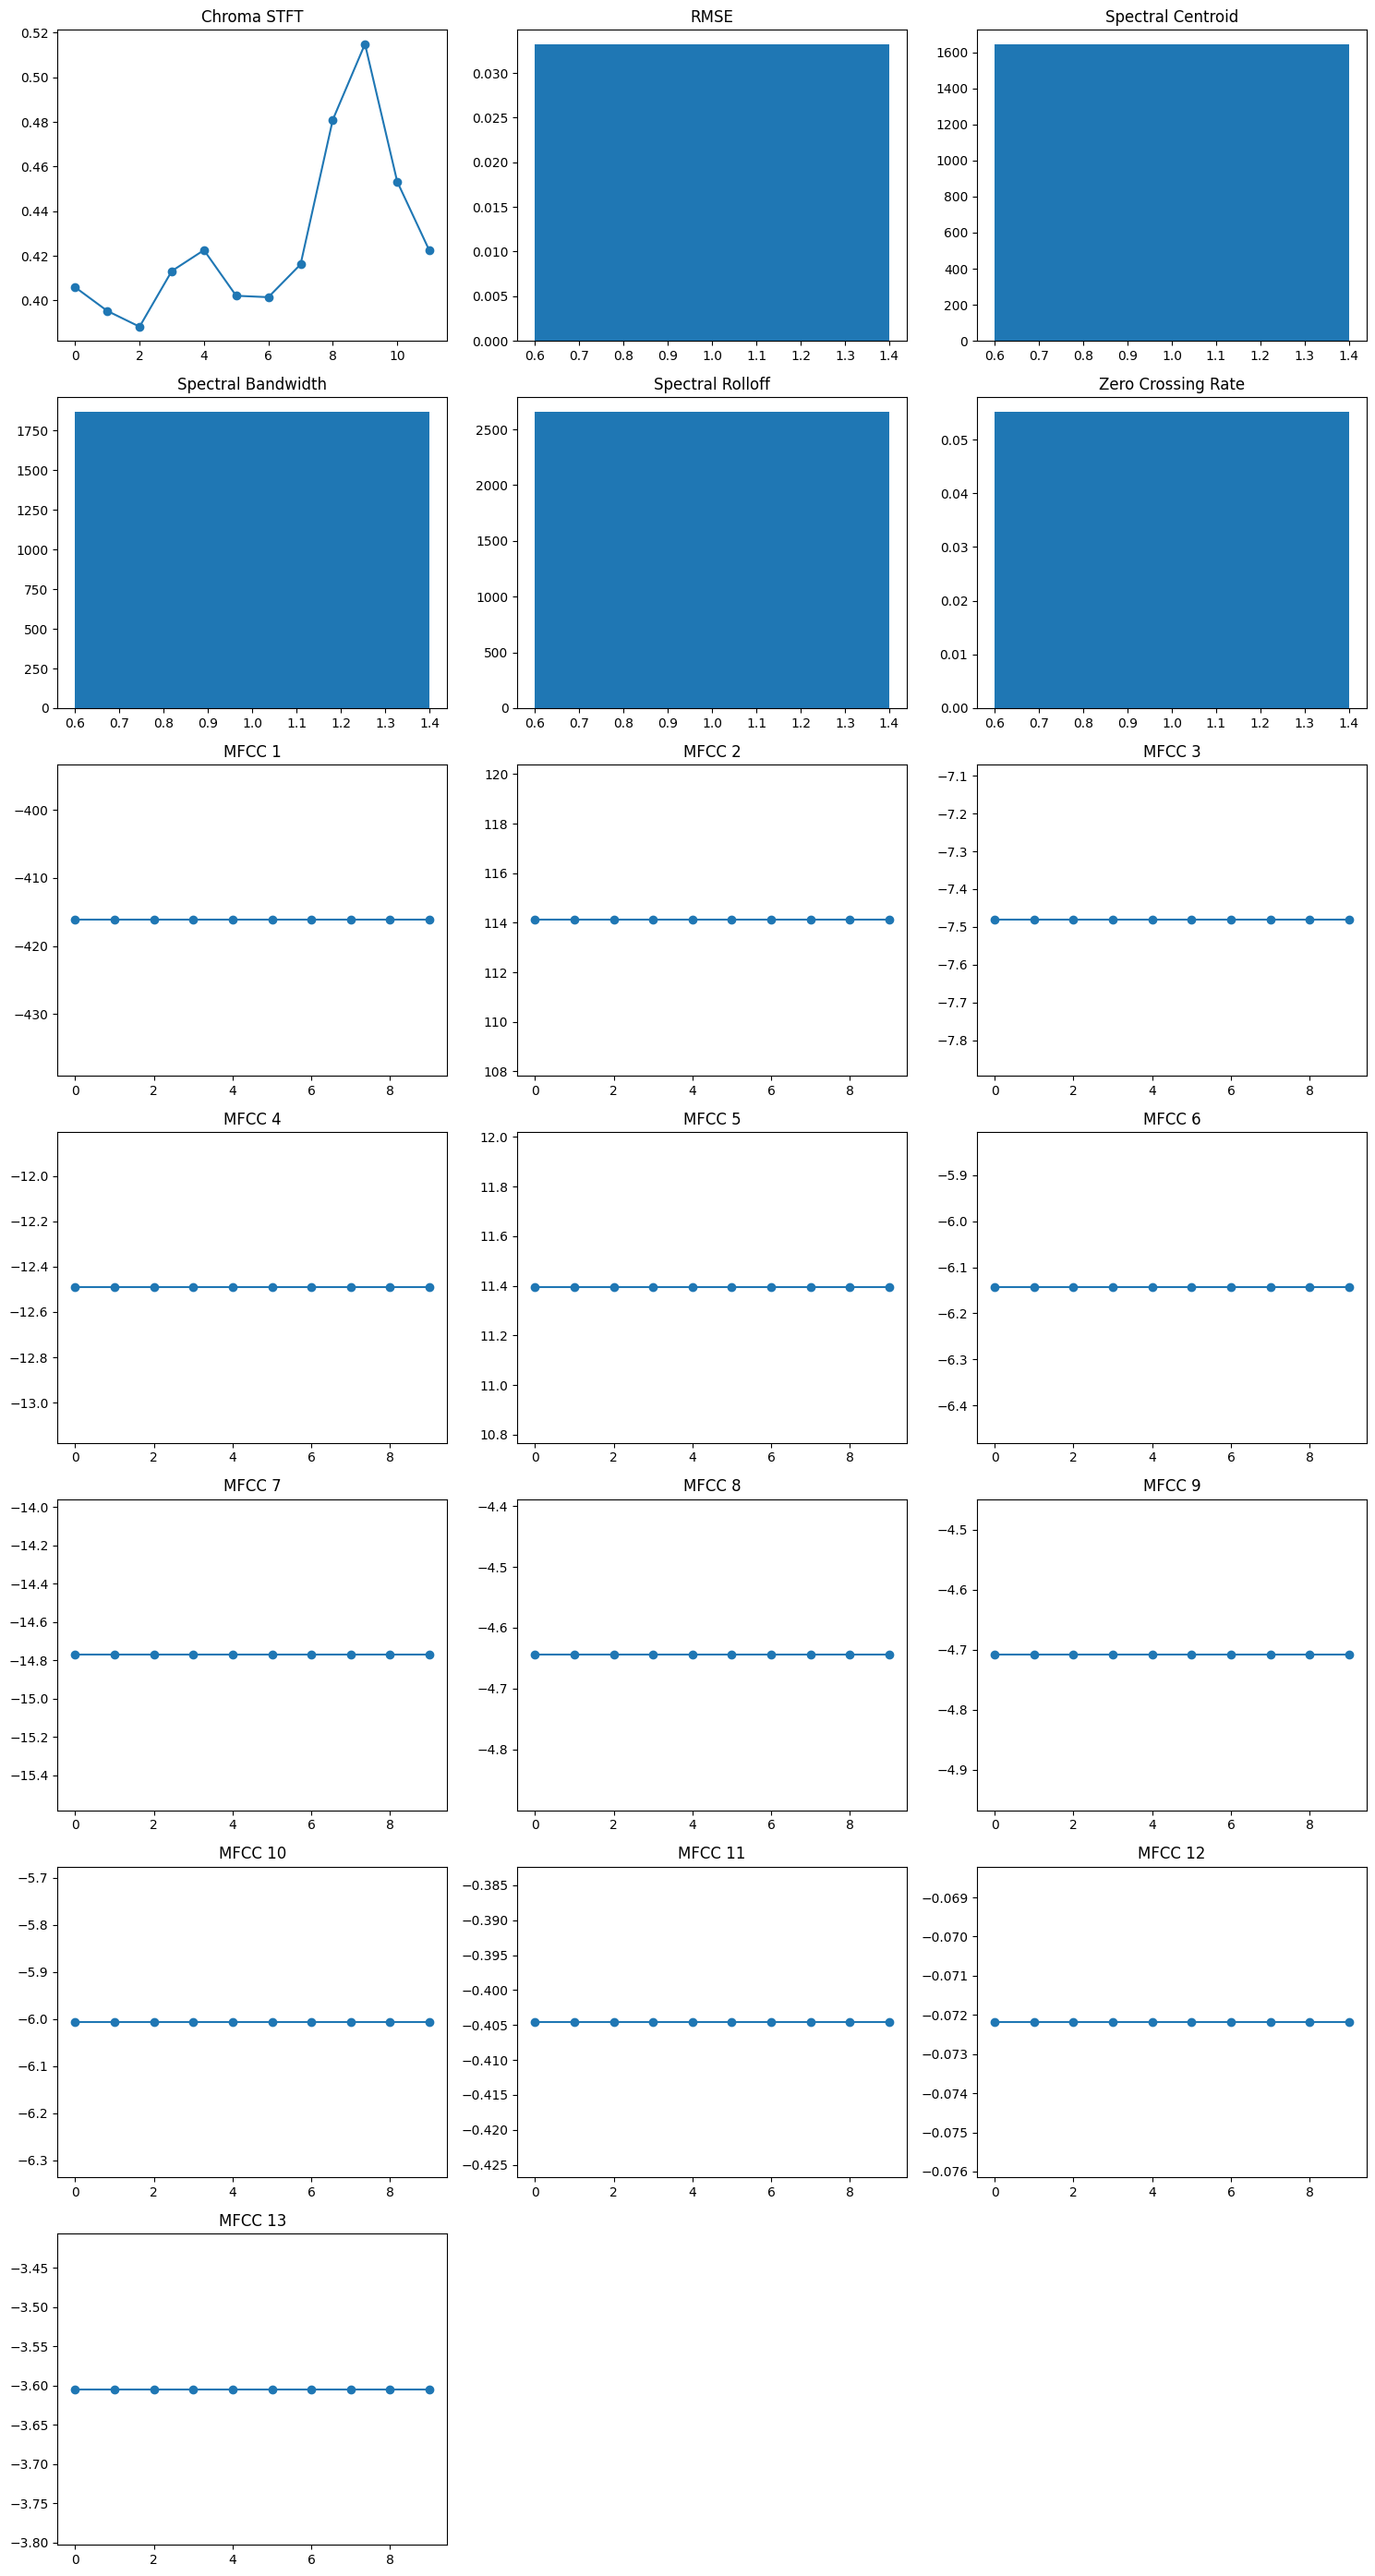

Plotting features for Interview_2.json...


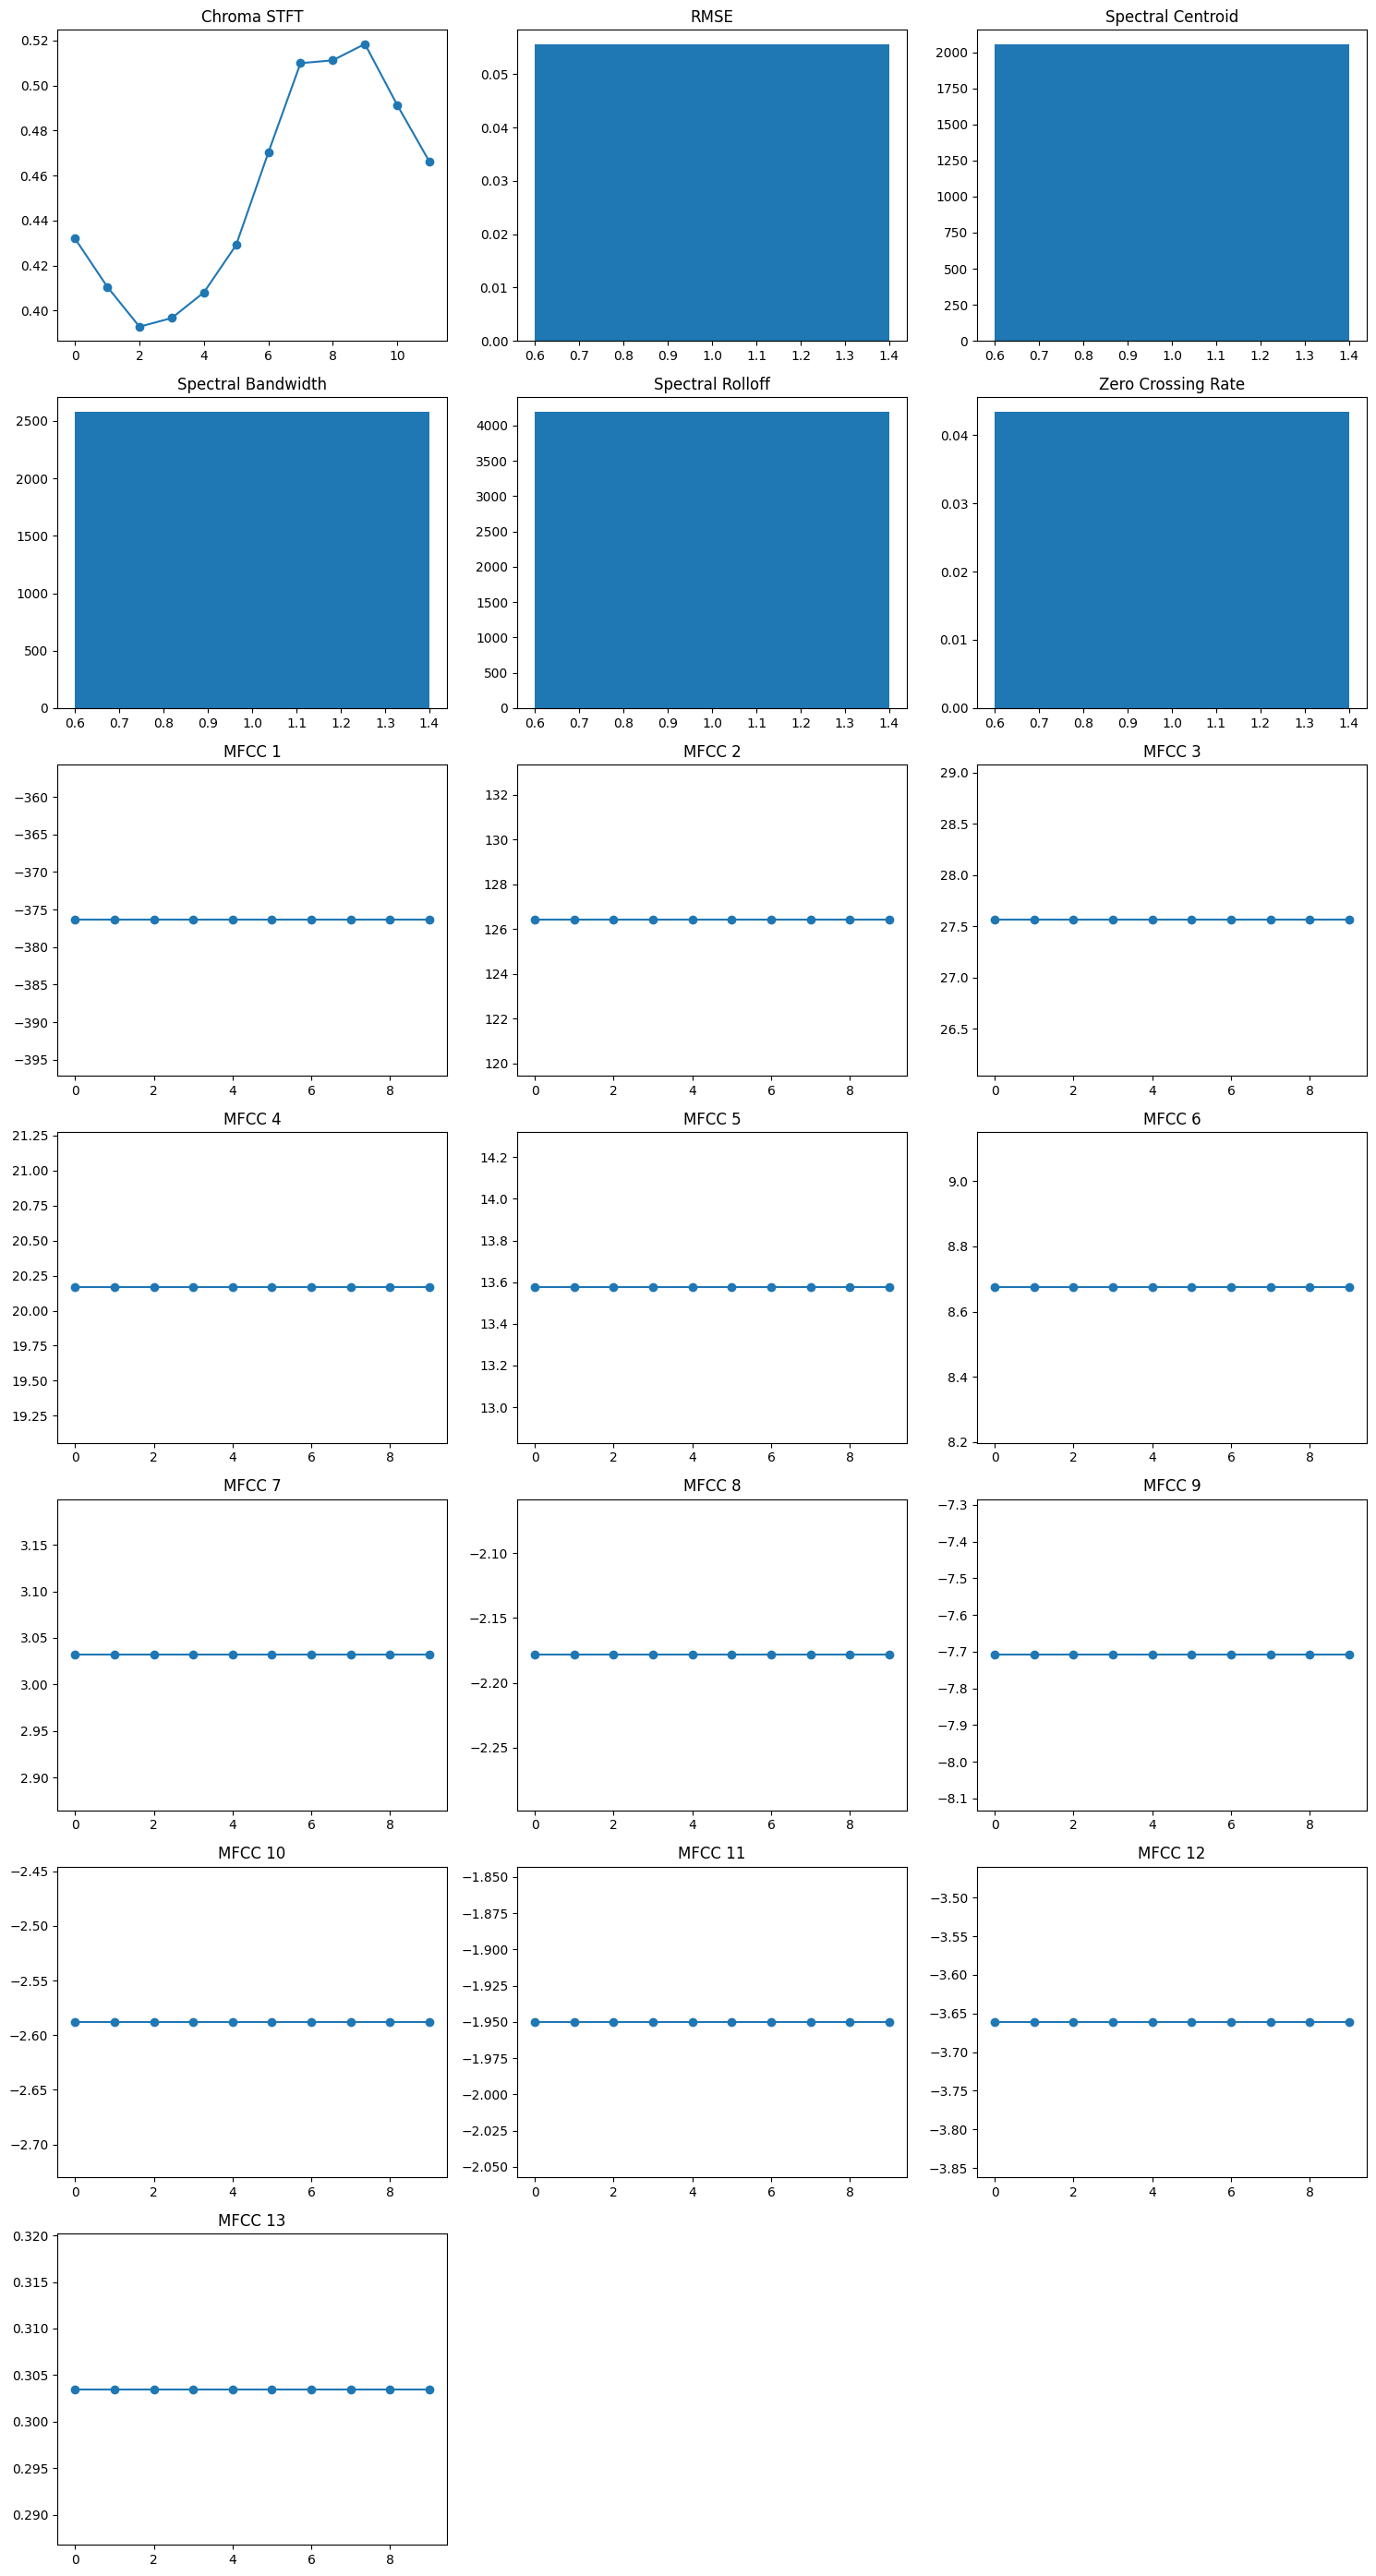

Plotting features for Interview_3.json...


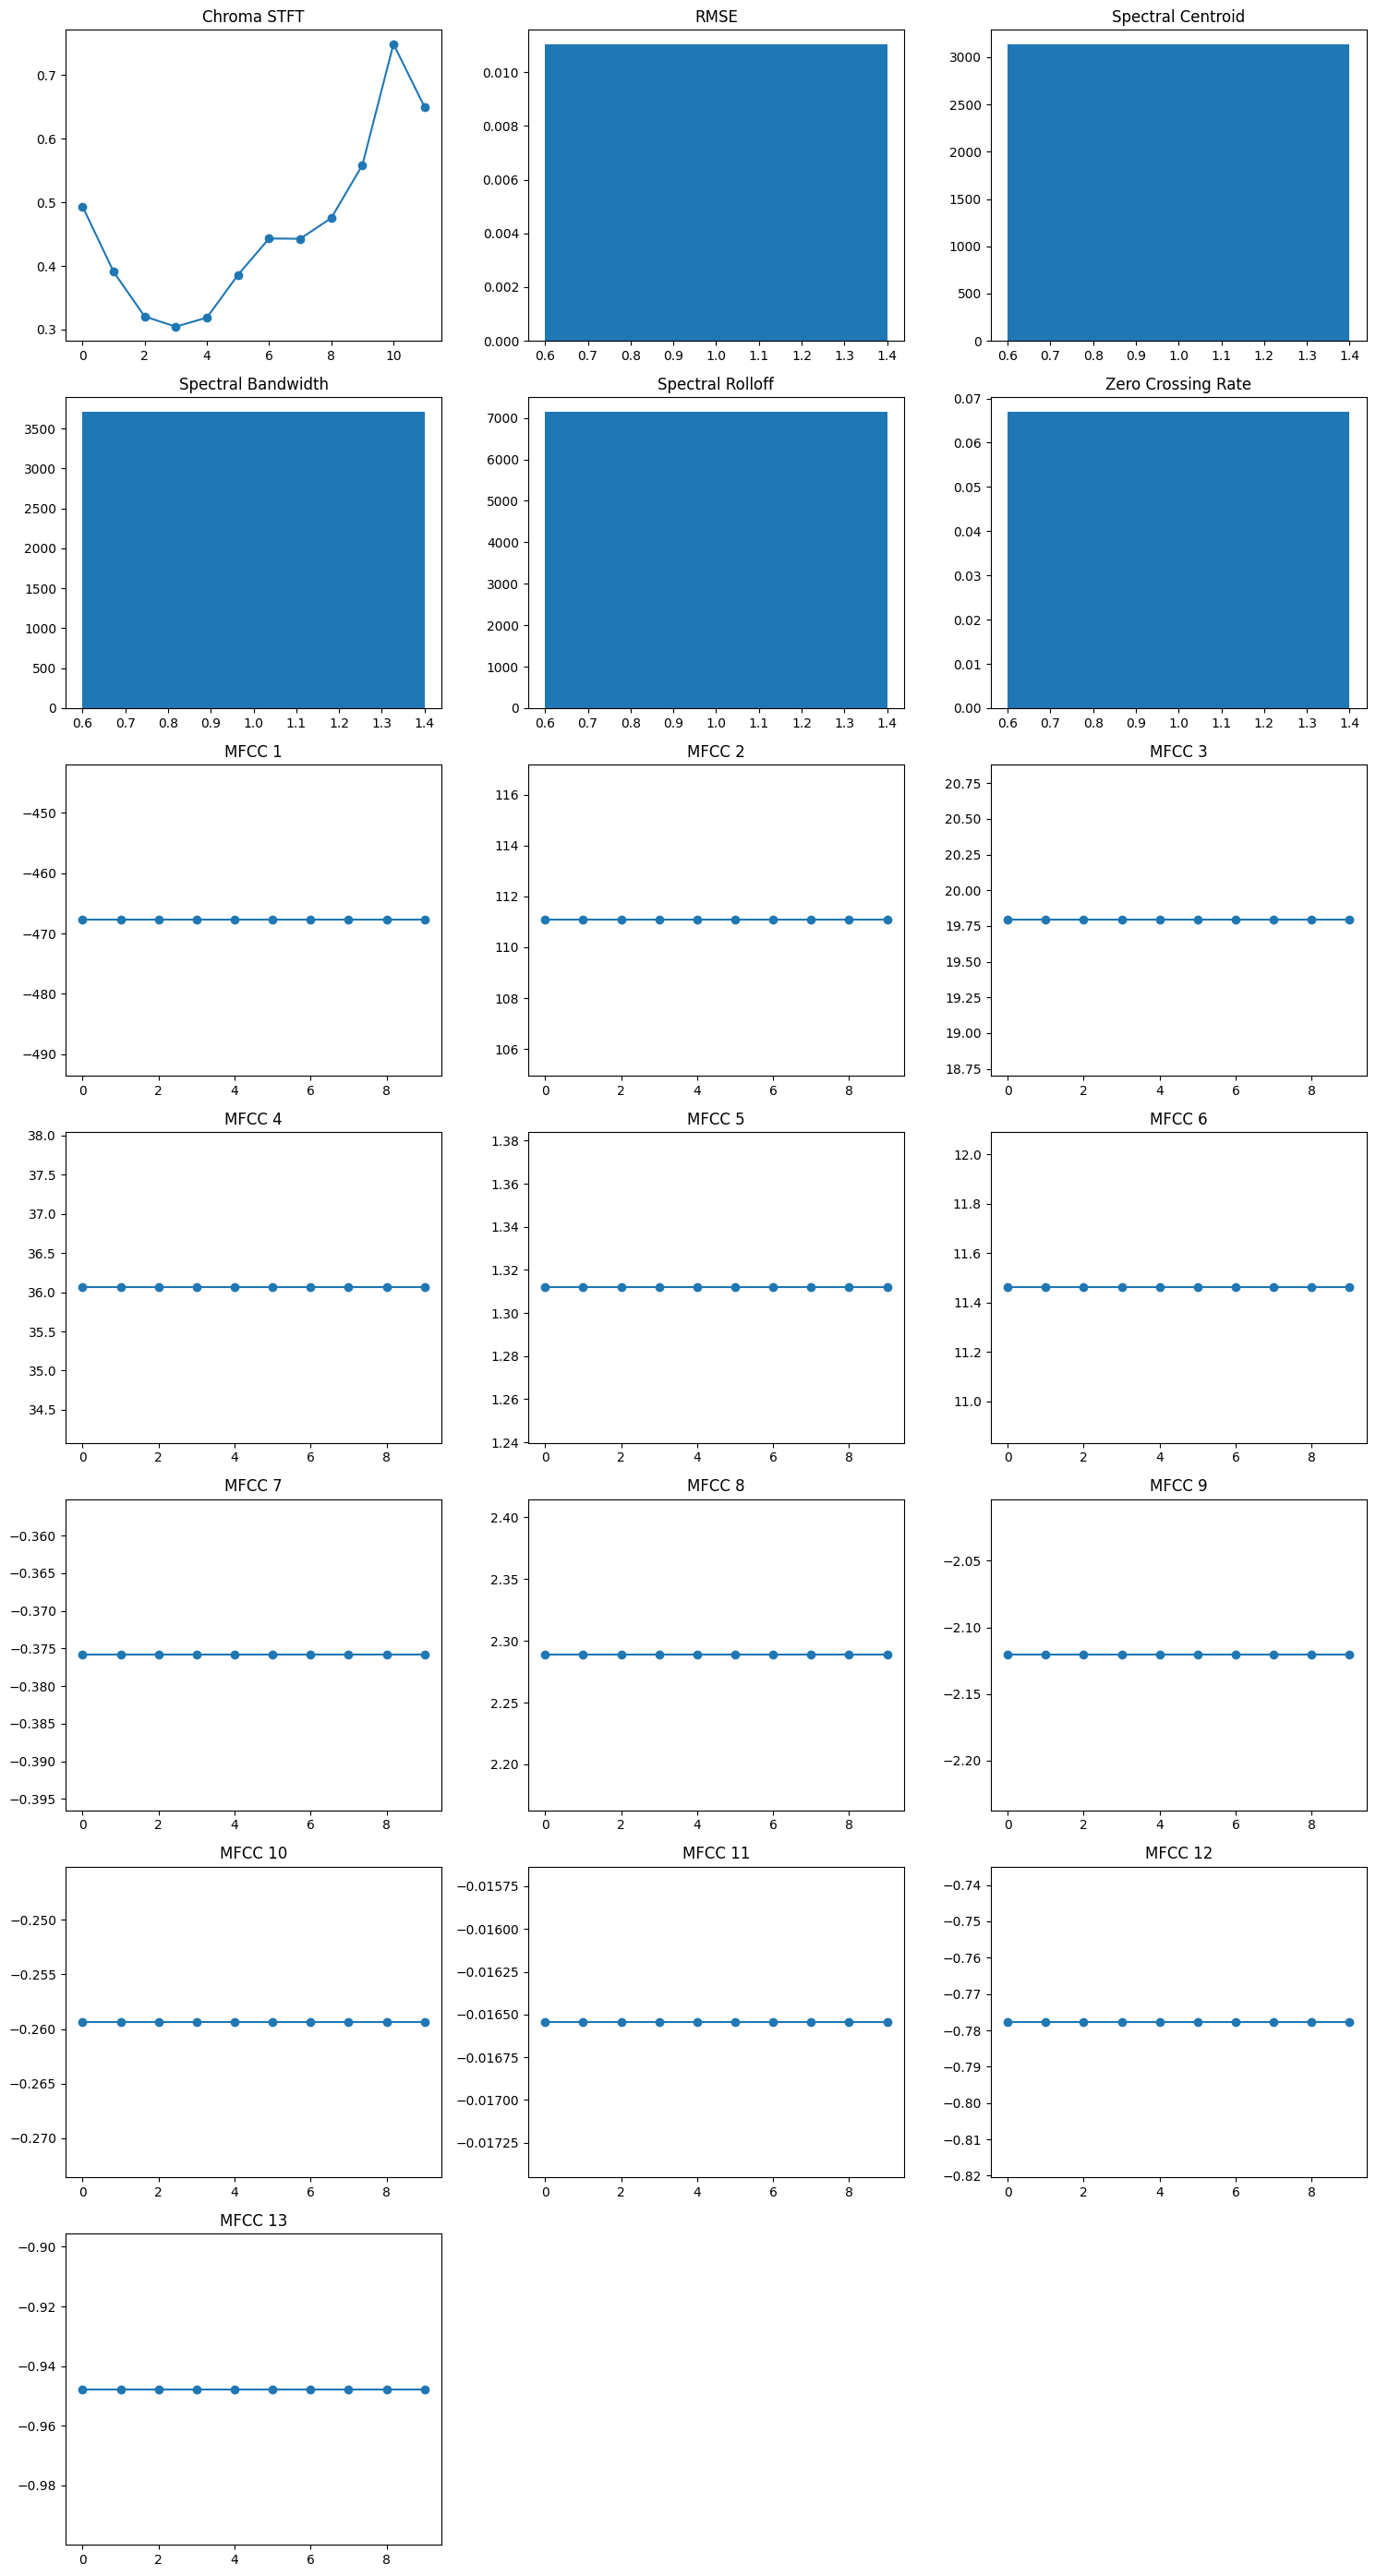

Plotting features for Interview_4.json...


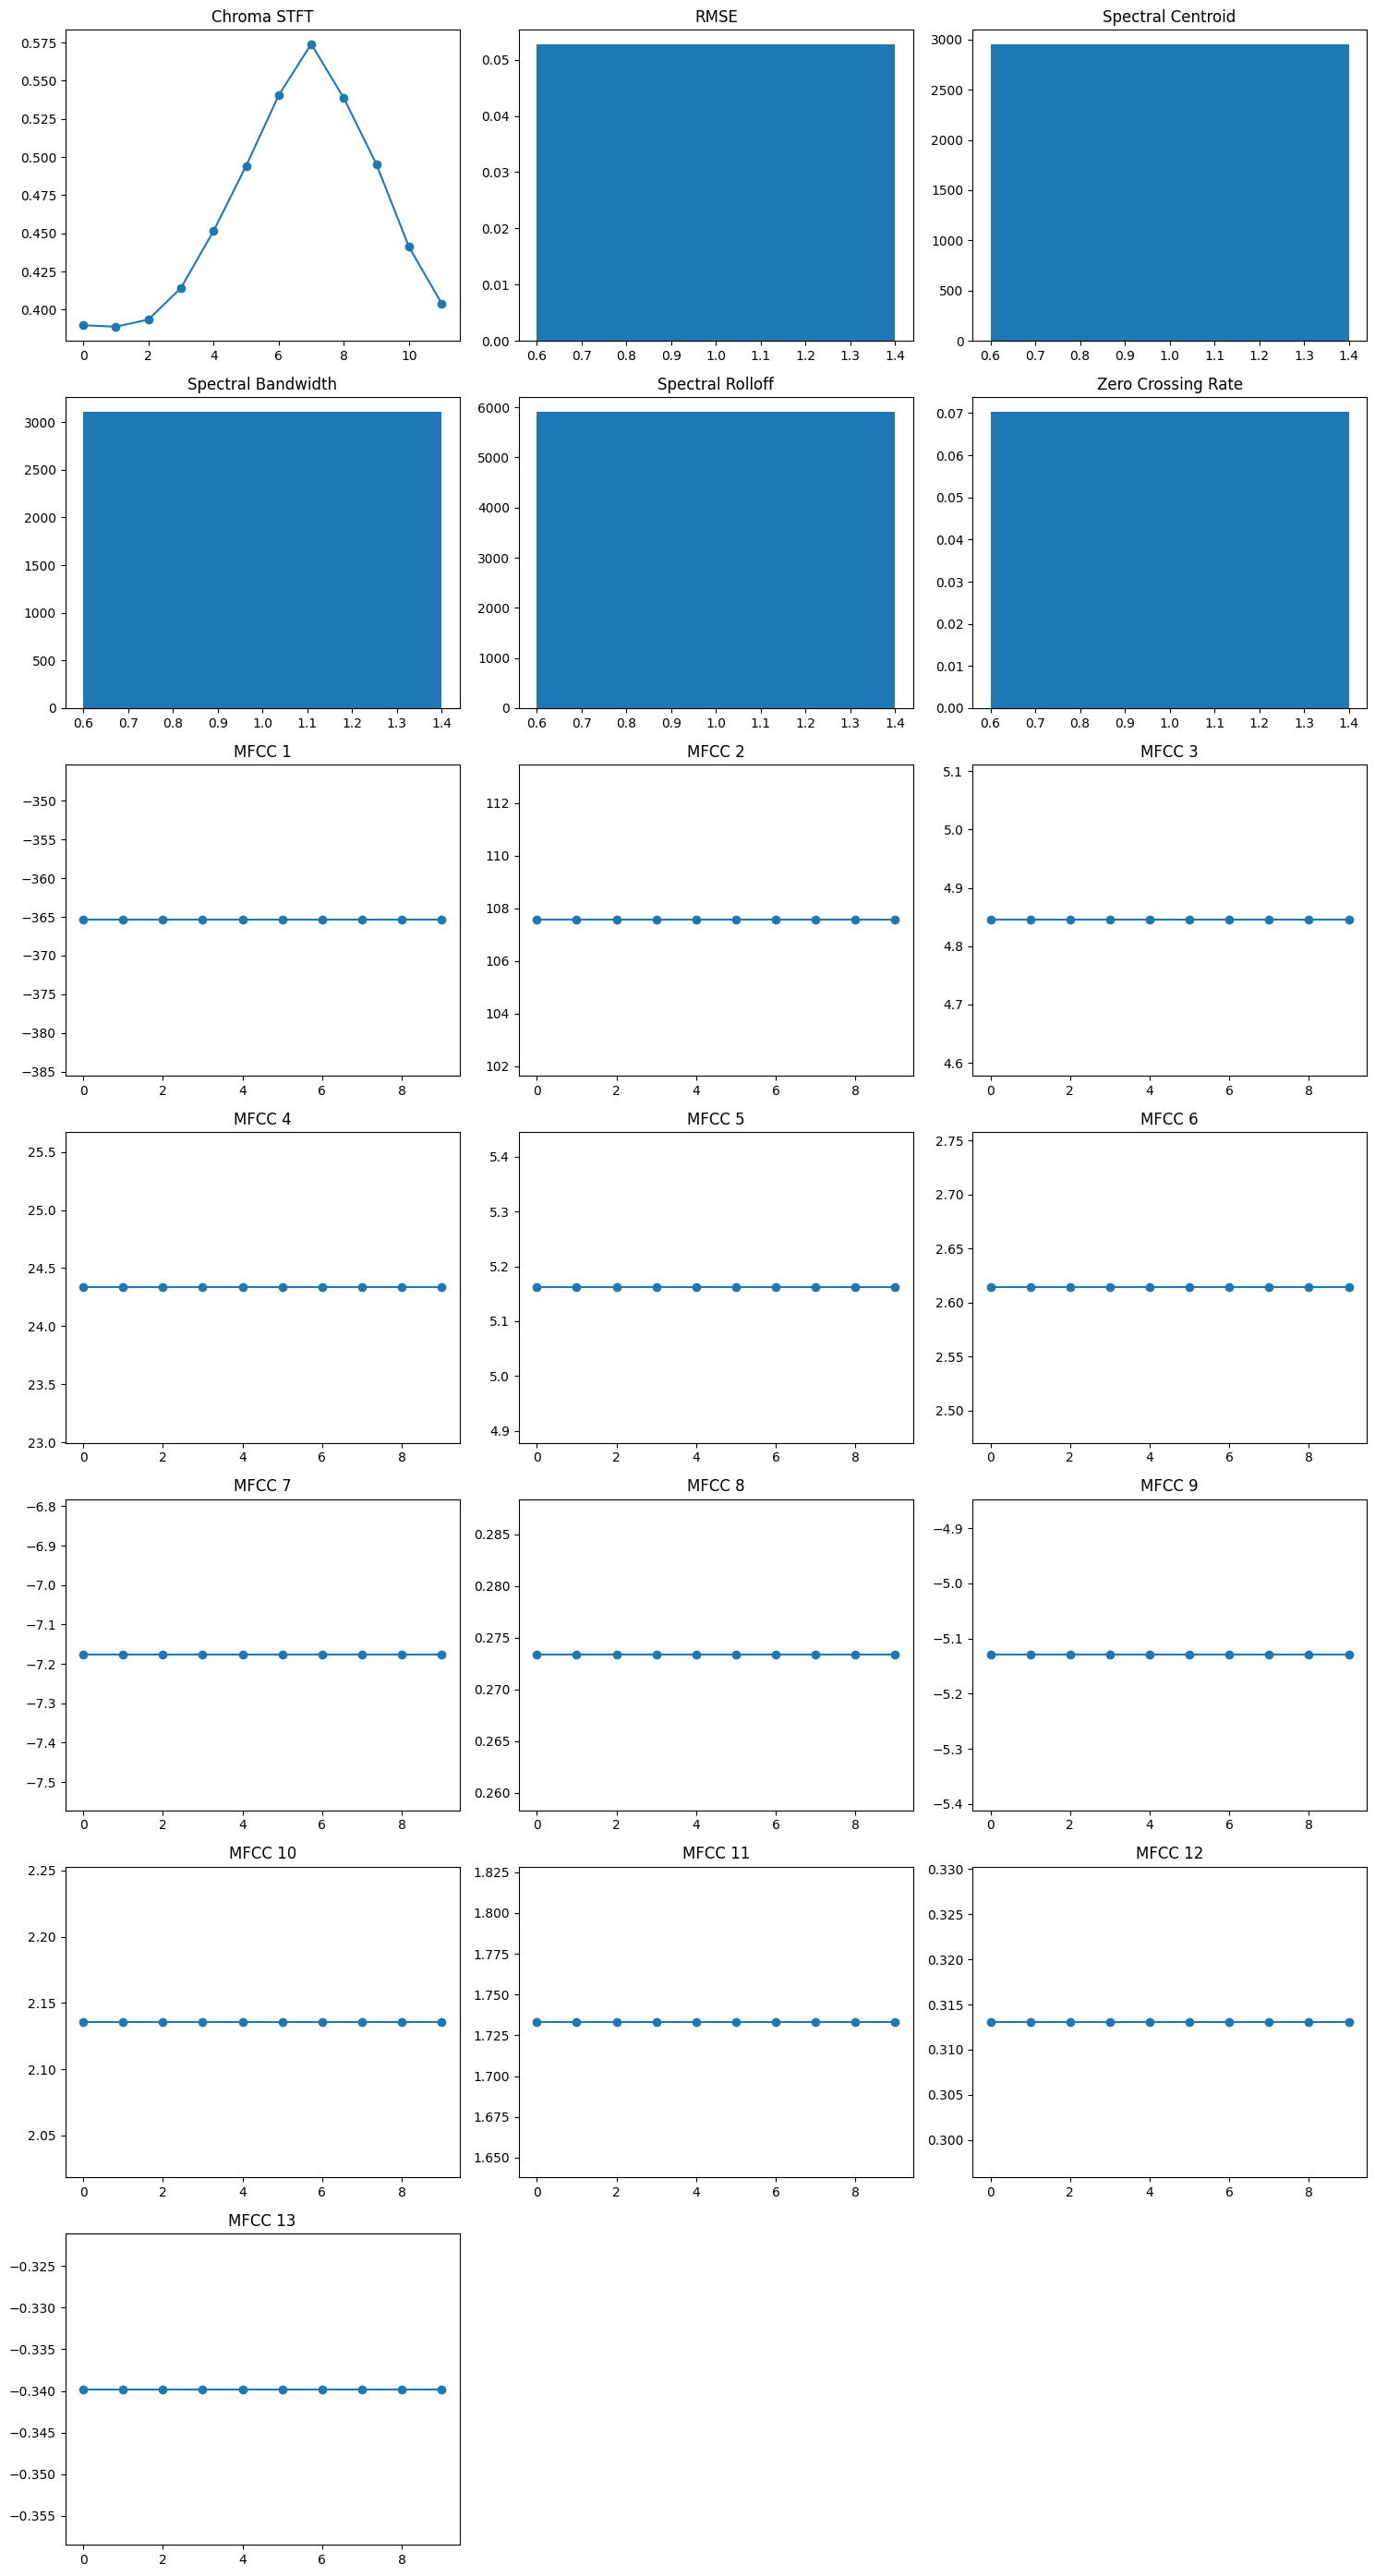

Plotting features for Interview_5.json...


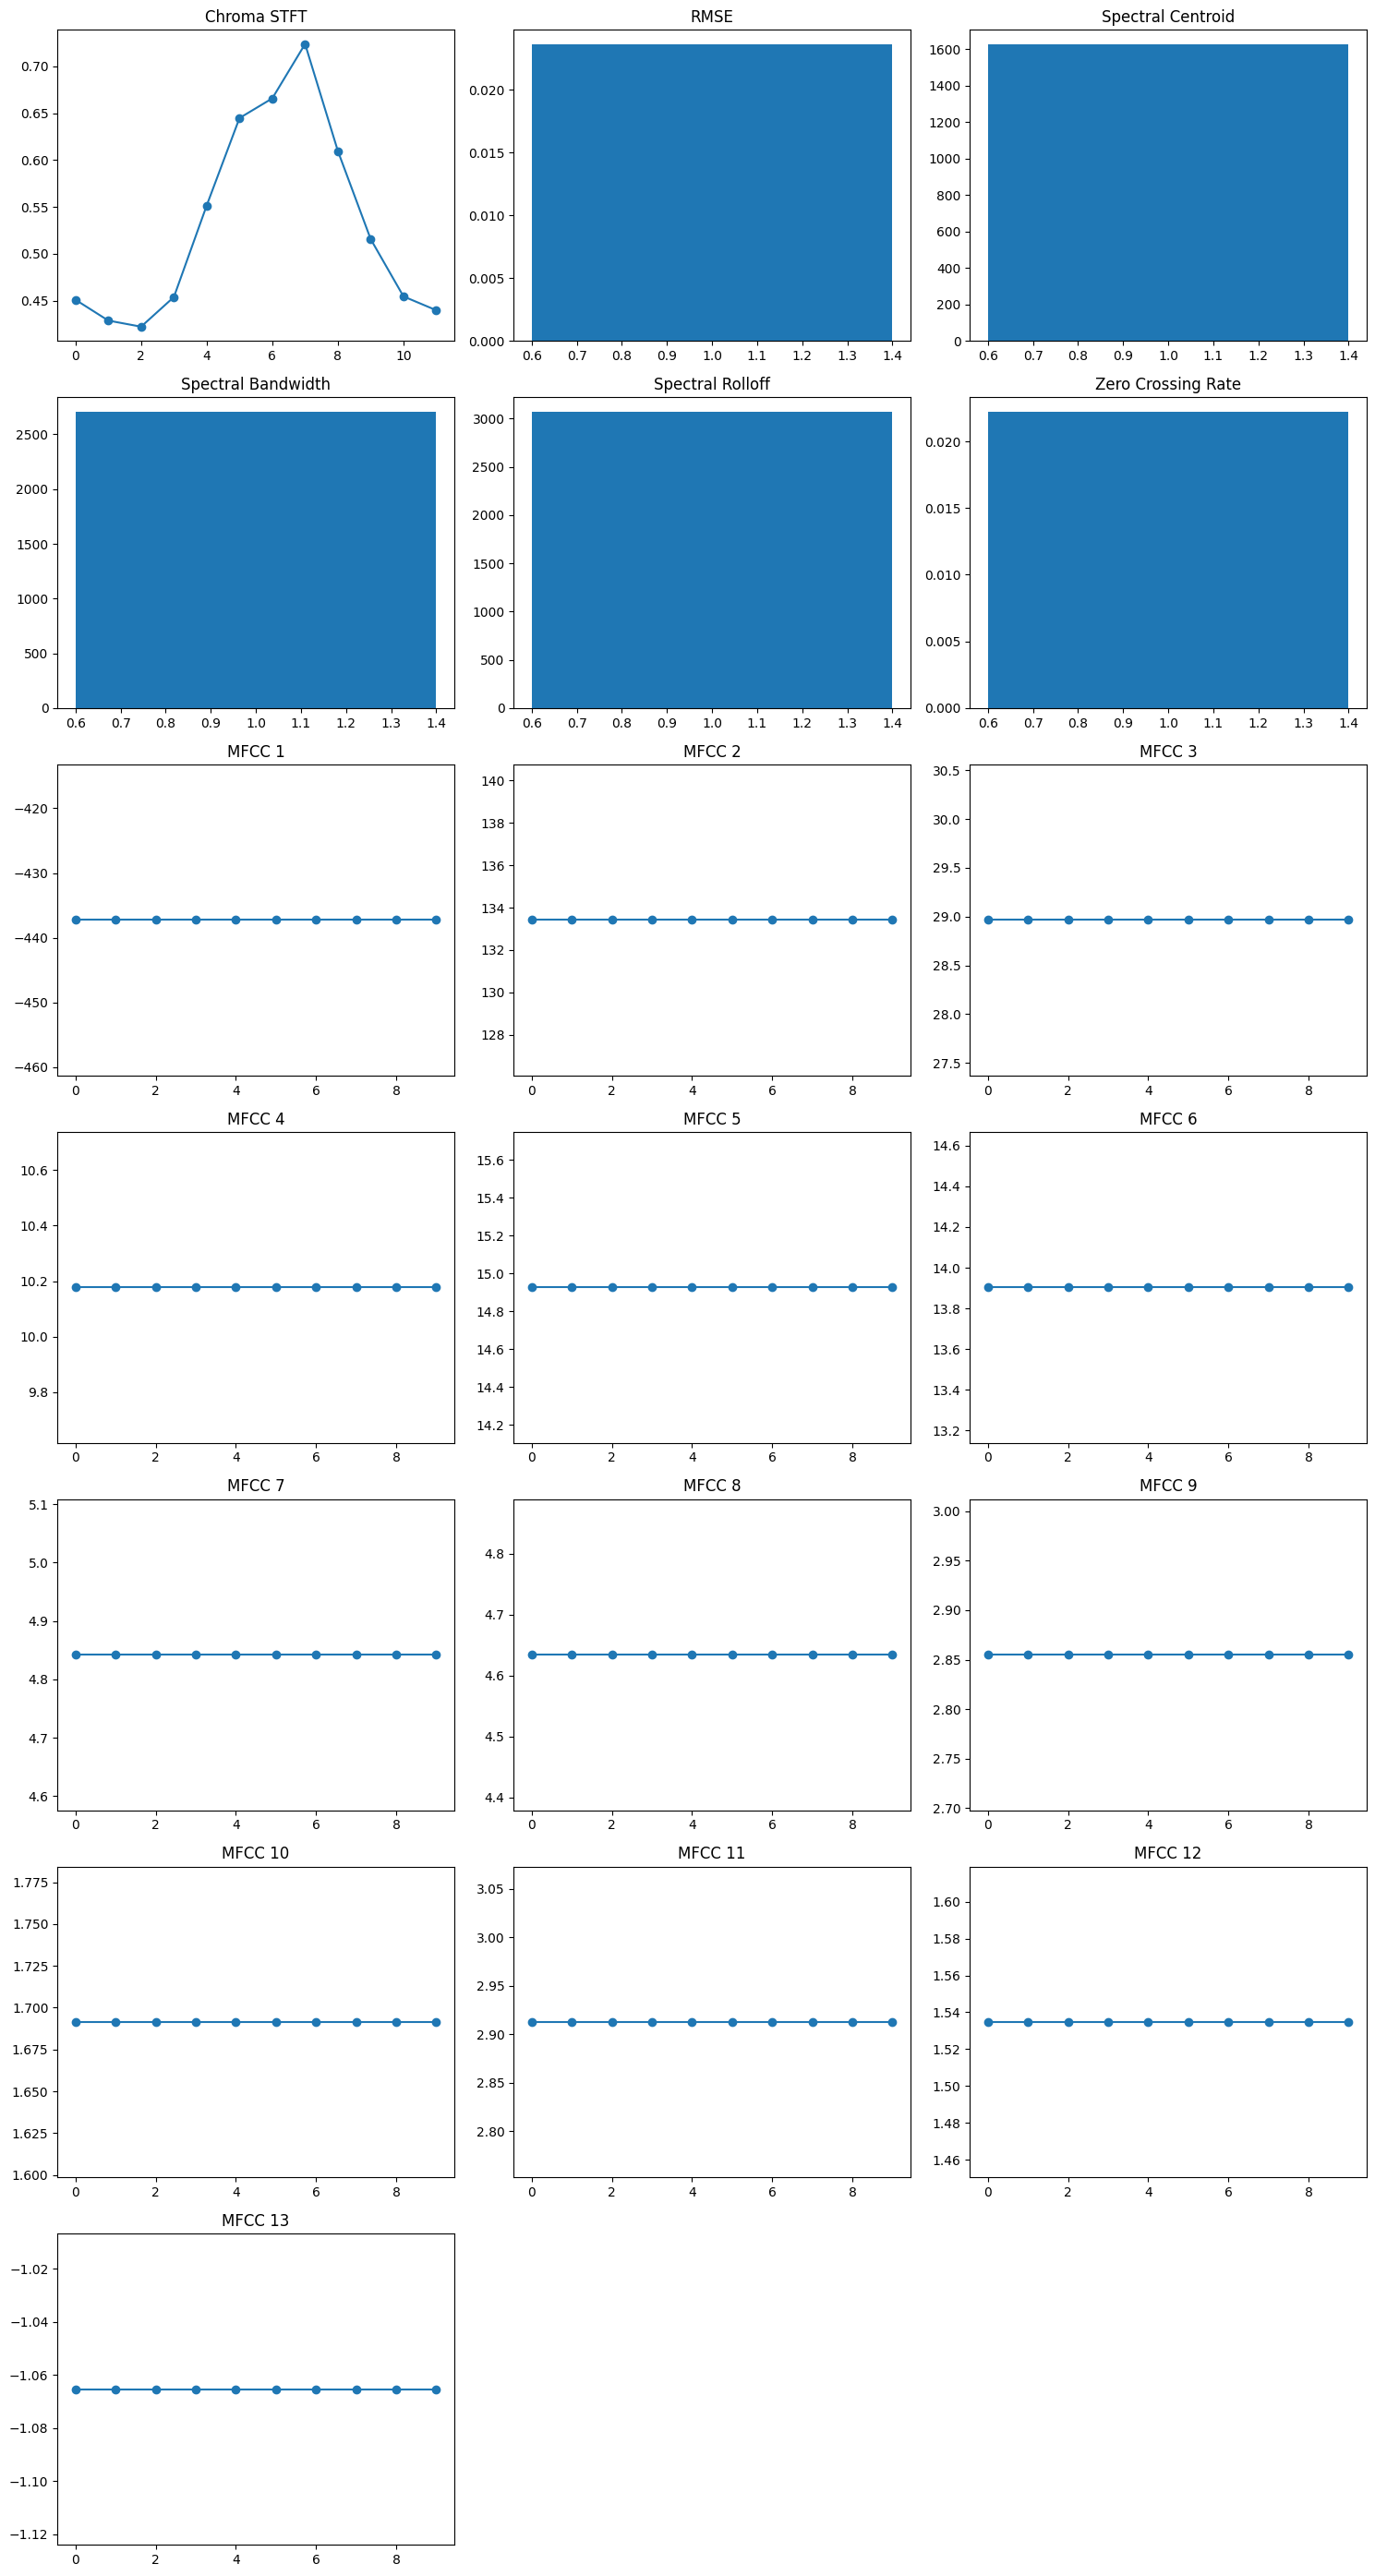

Plotting features for Interview_6.json...


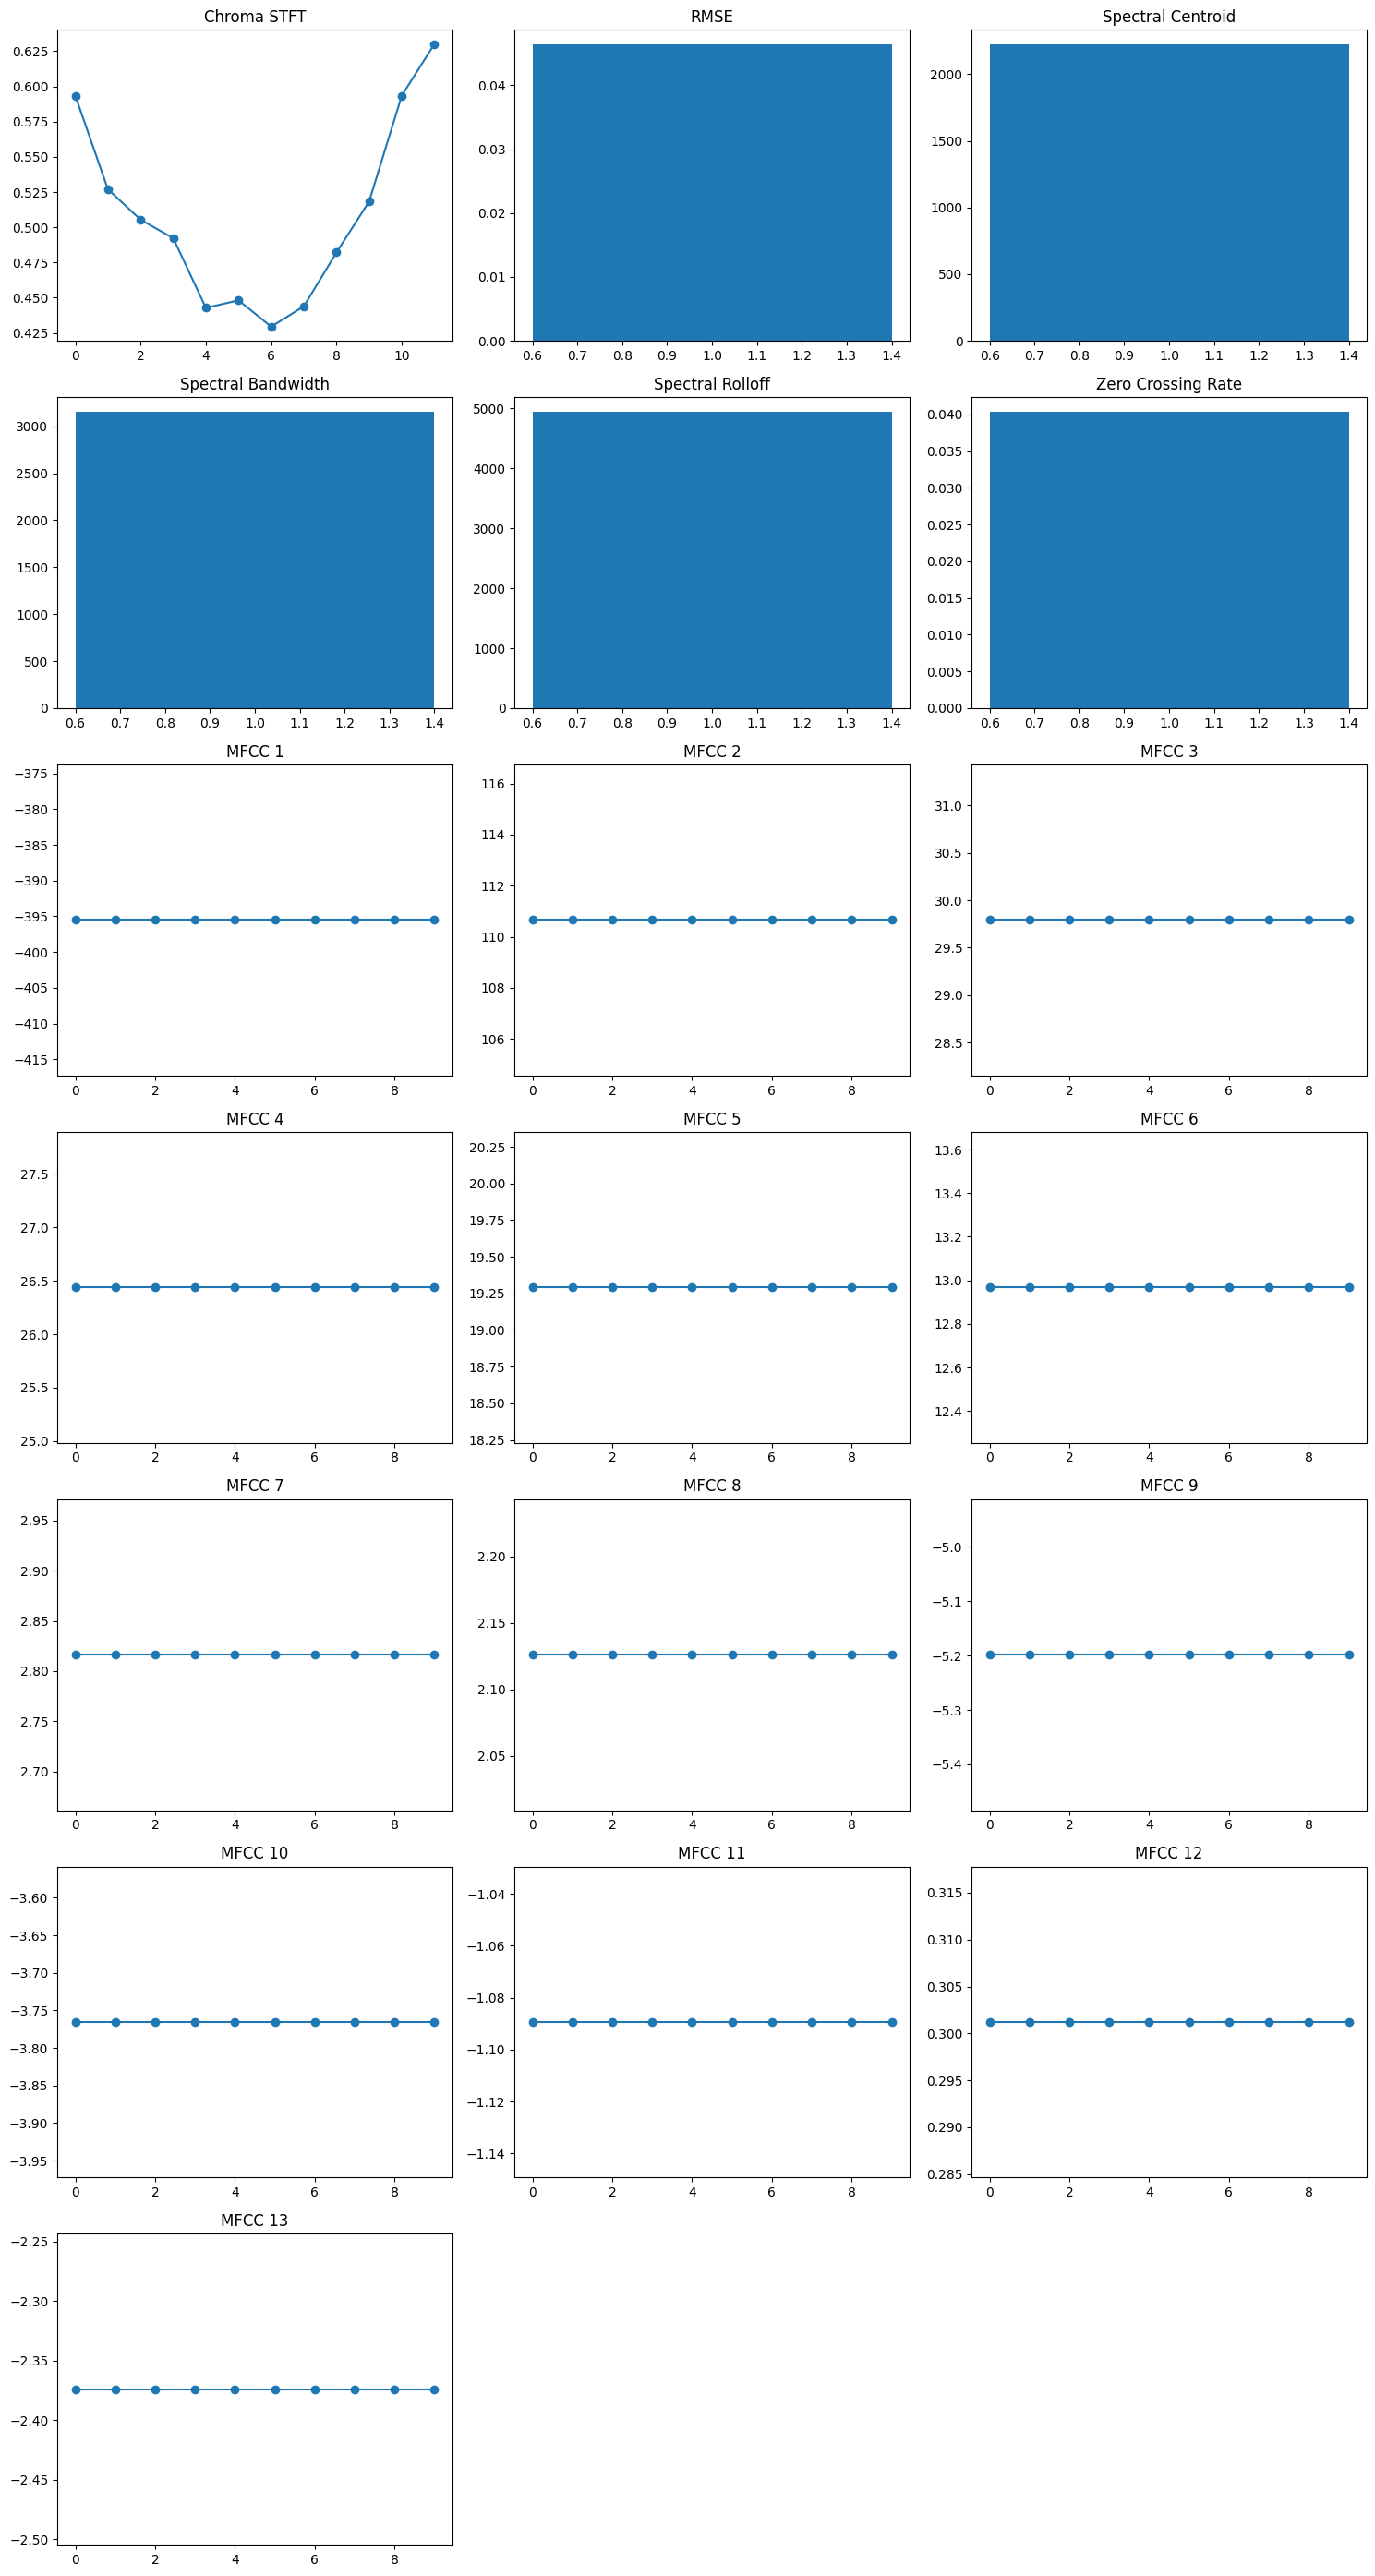

Plotting features for Interview_7.json...


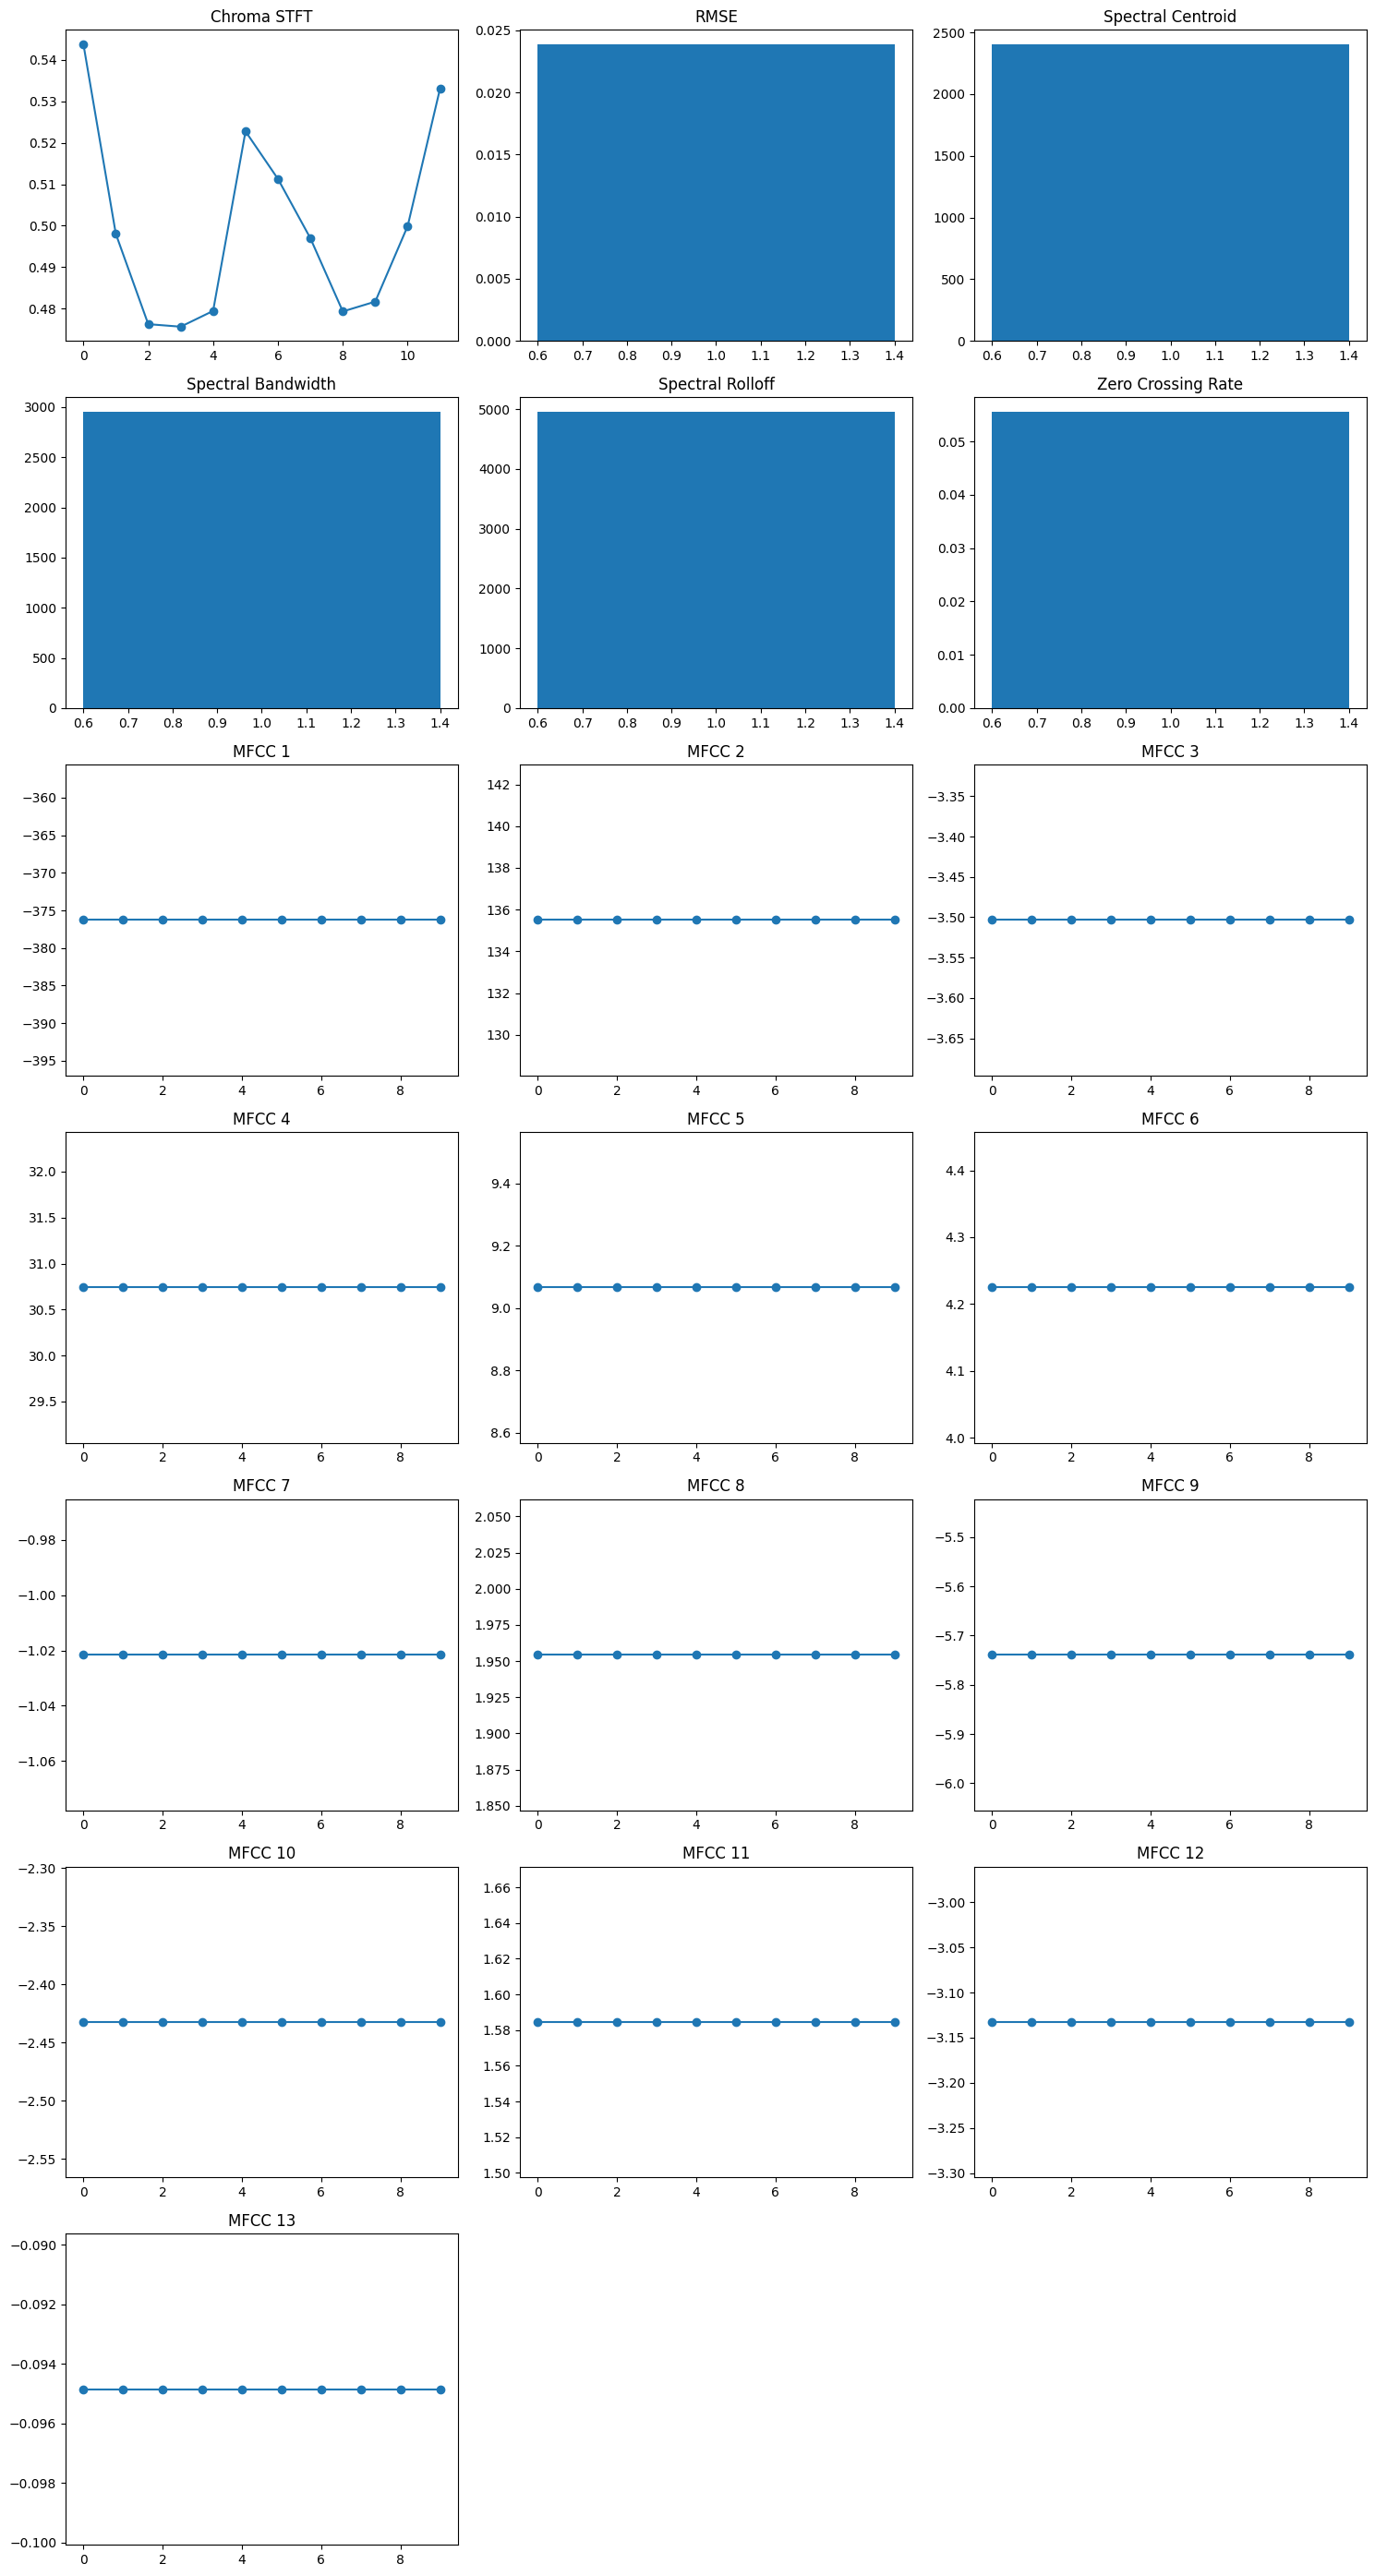

Plotting features for Interview_9.json...


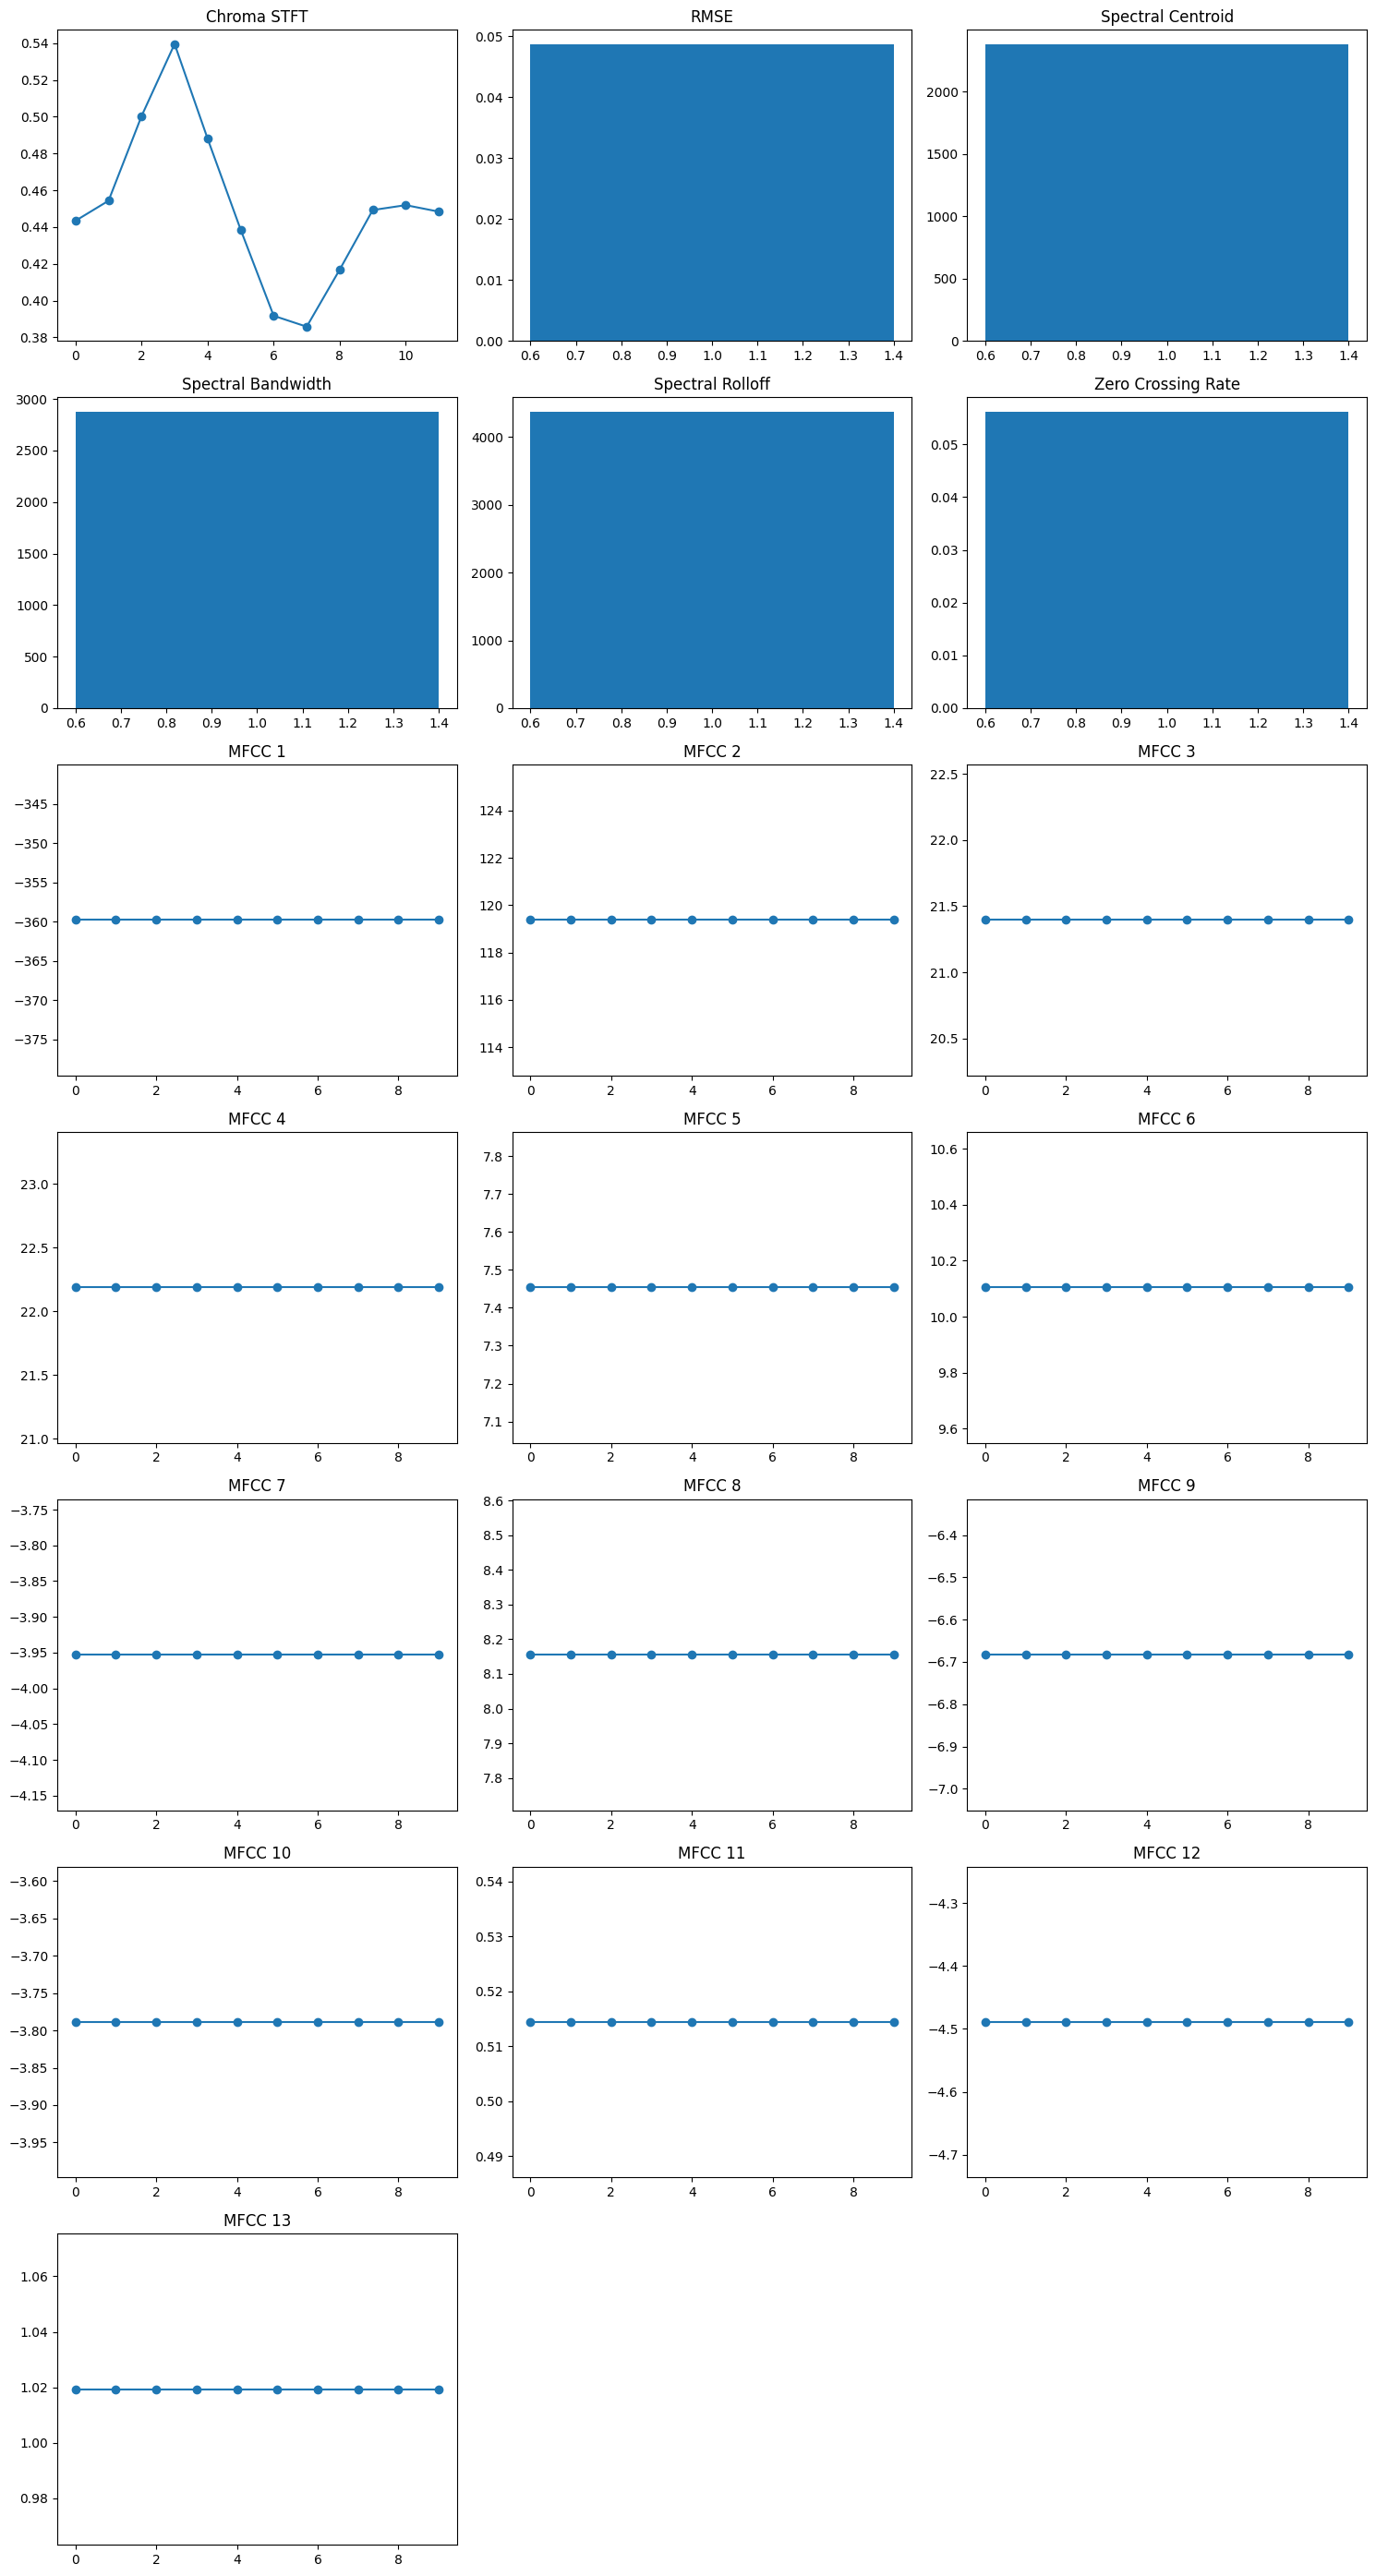

Plotting features for Interview_10.json...


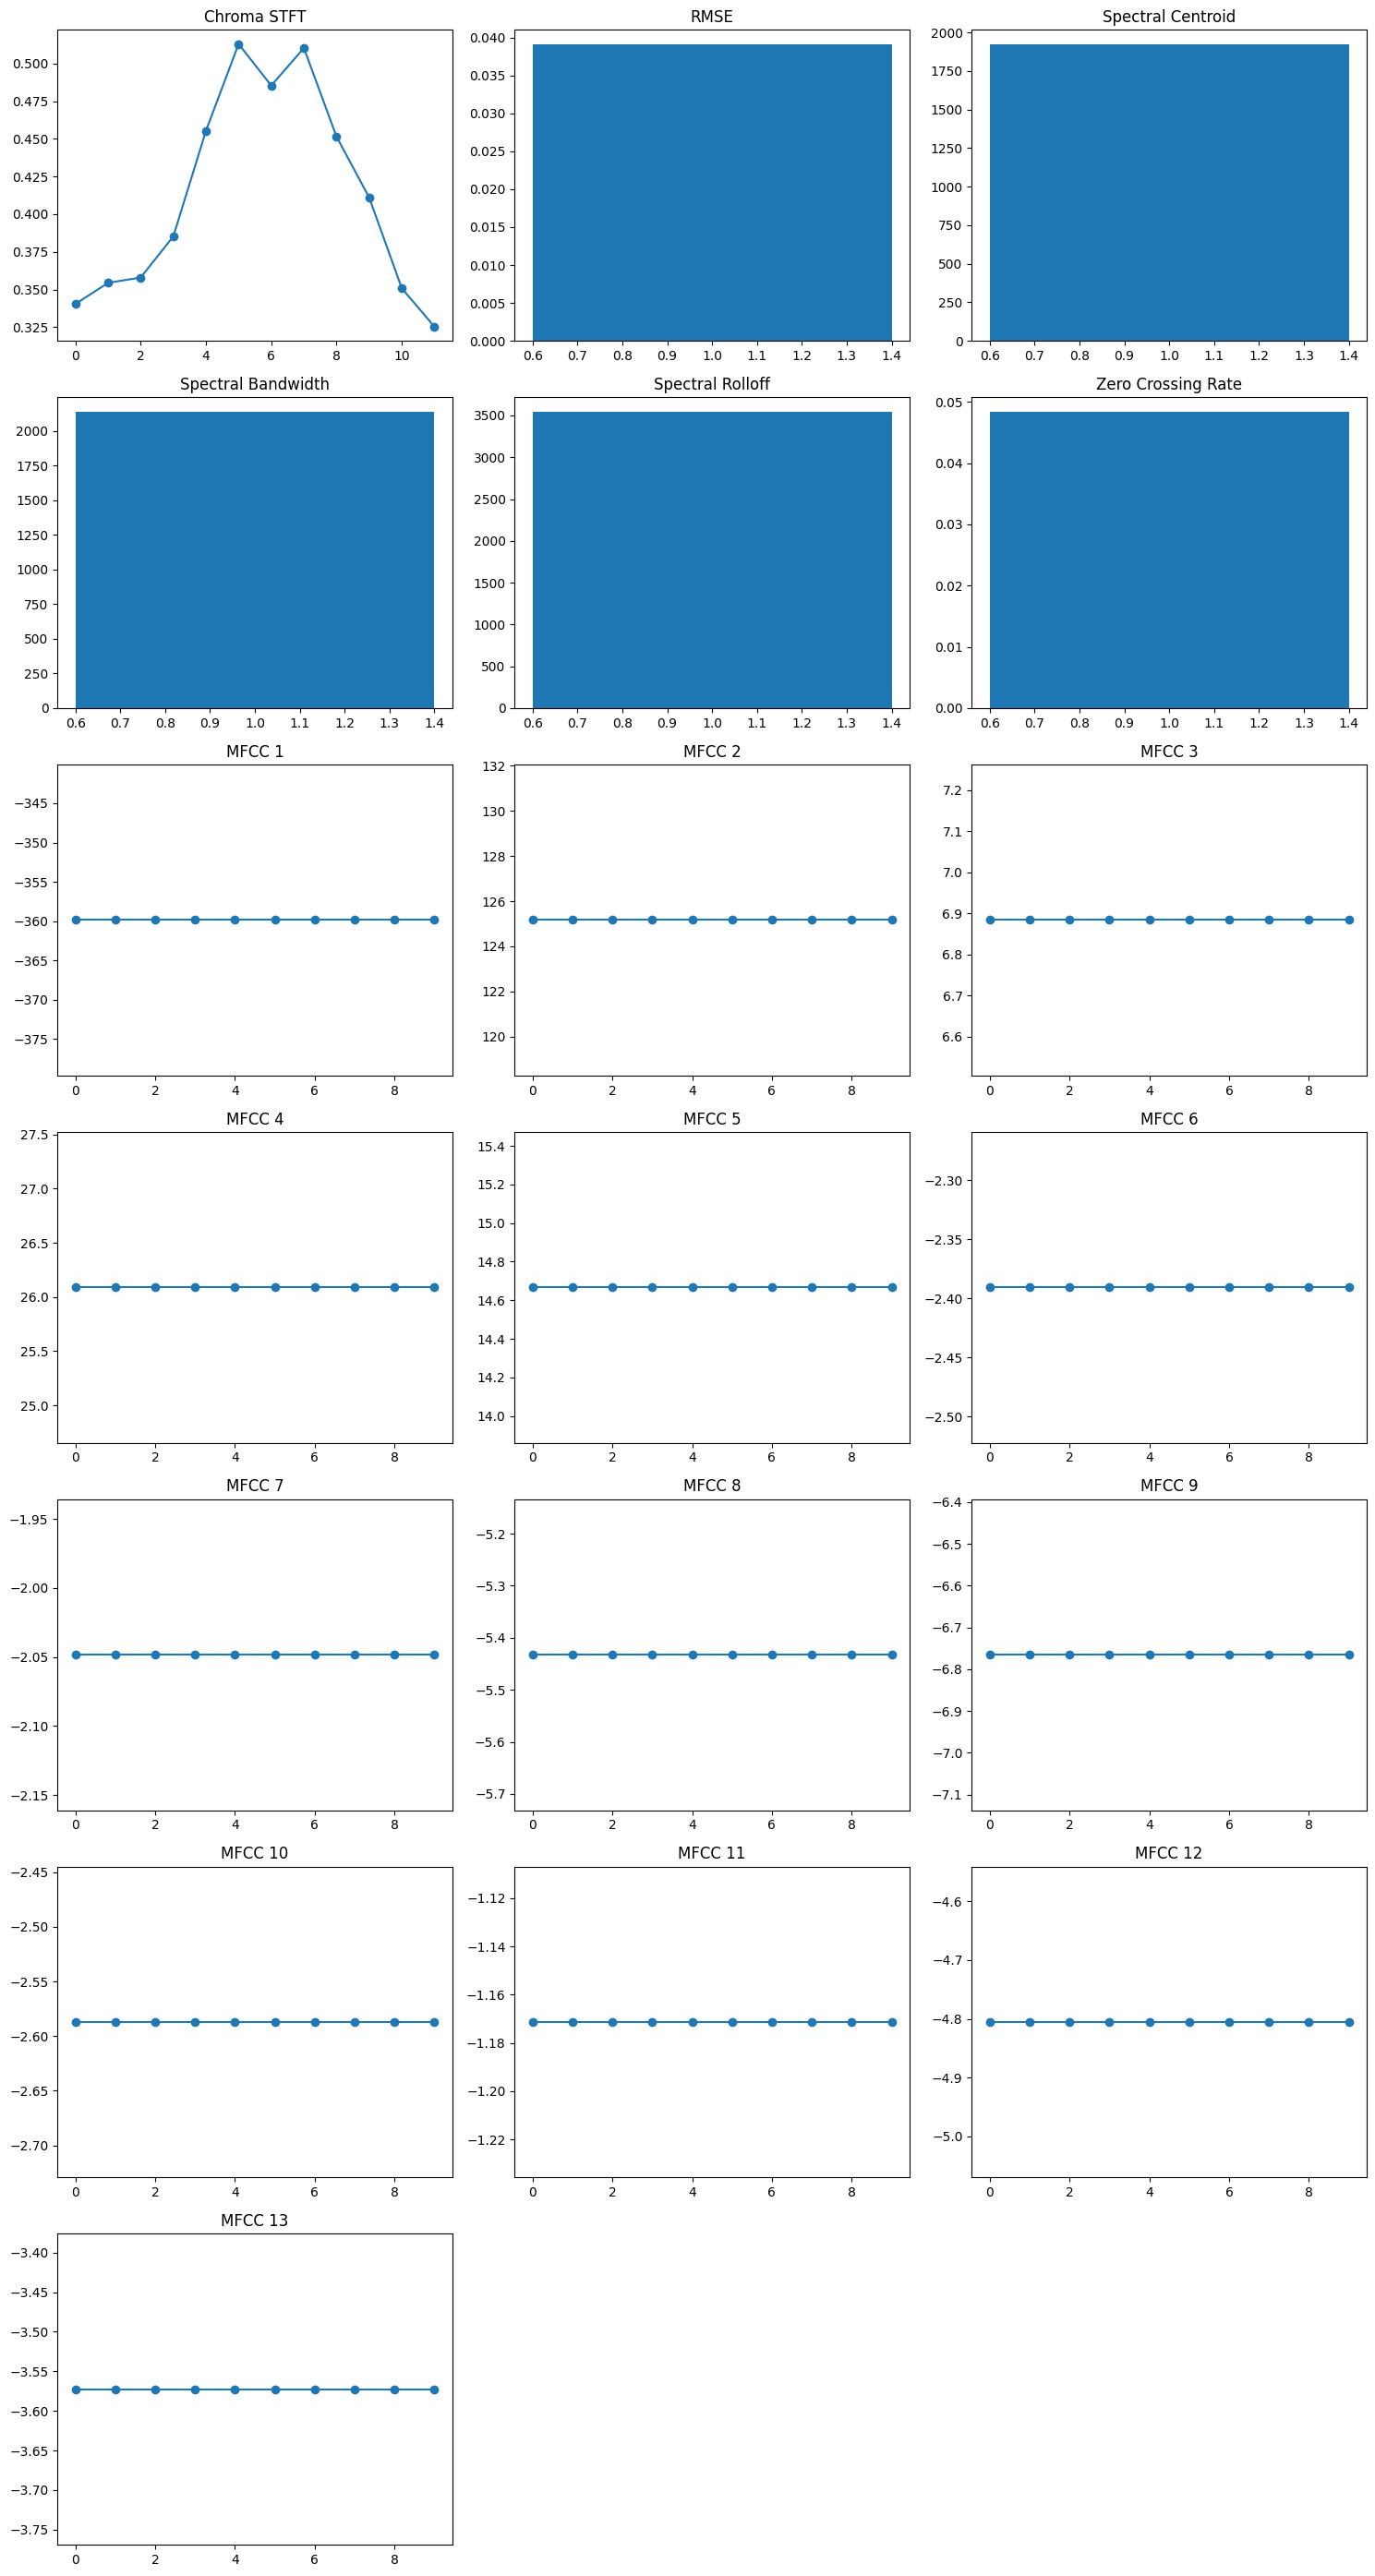

Plotting features for Interview_11.json...


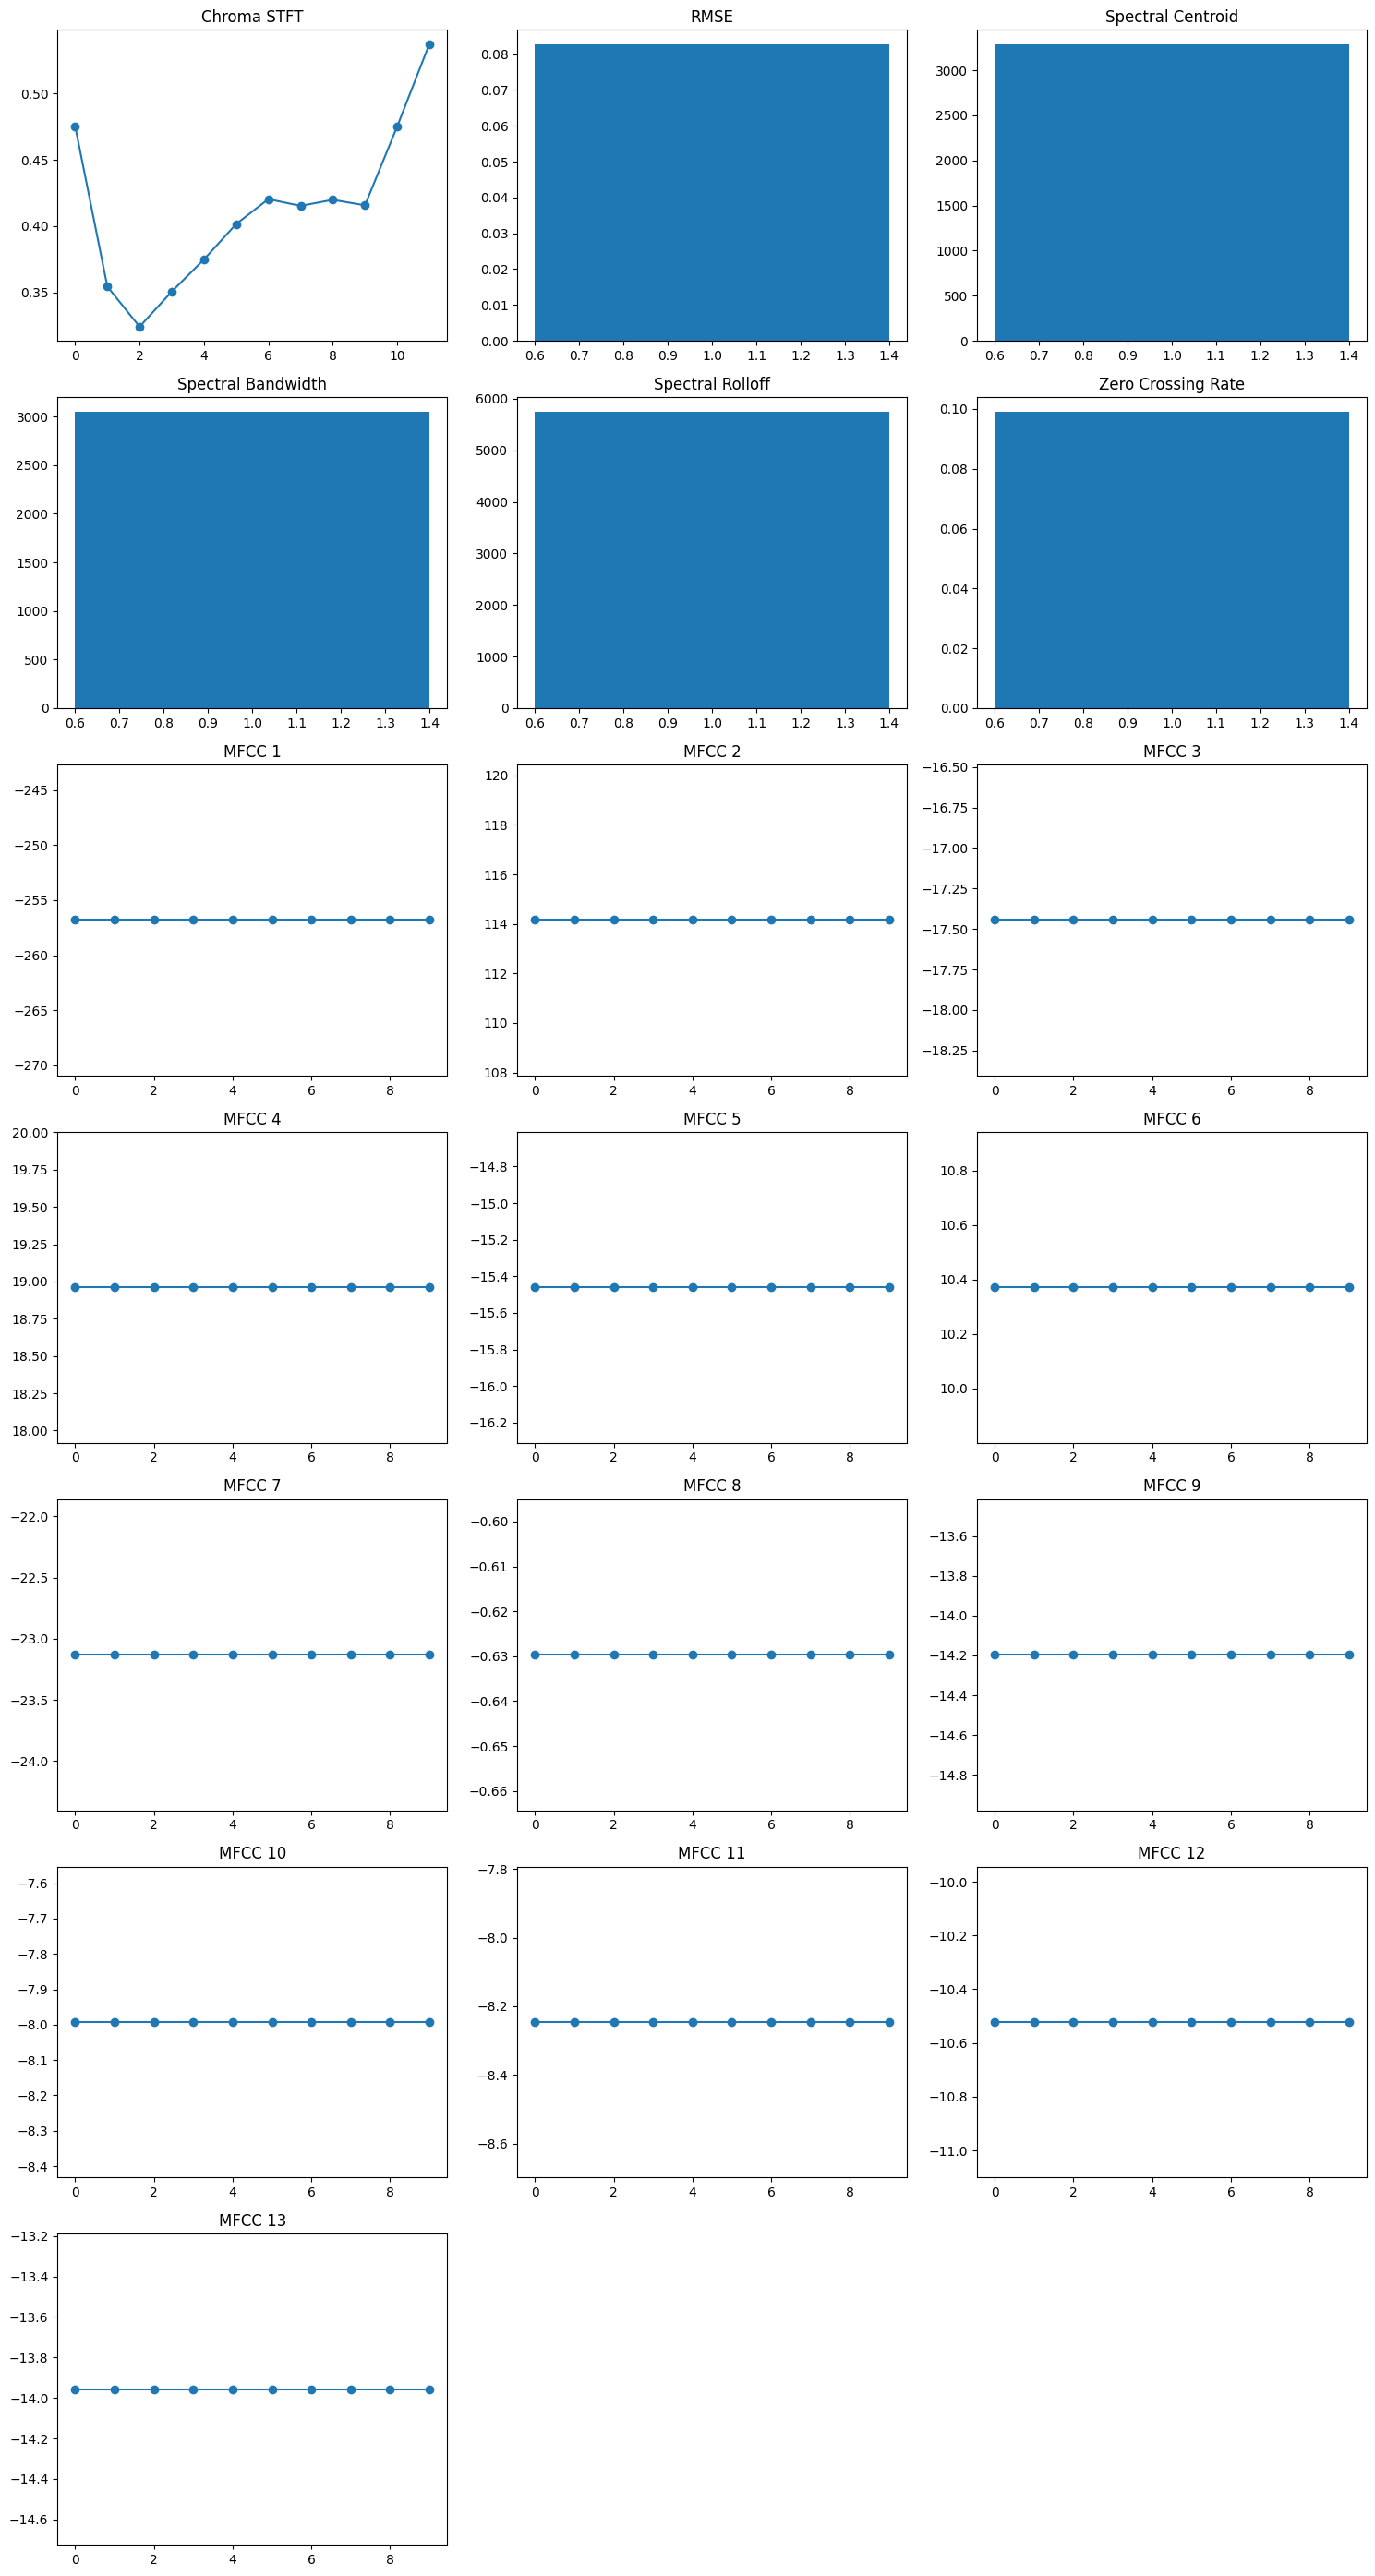

Plotting features for Interview_8.json...


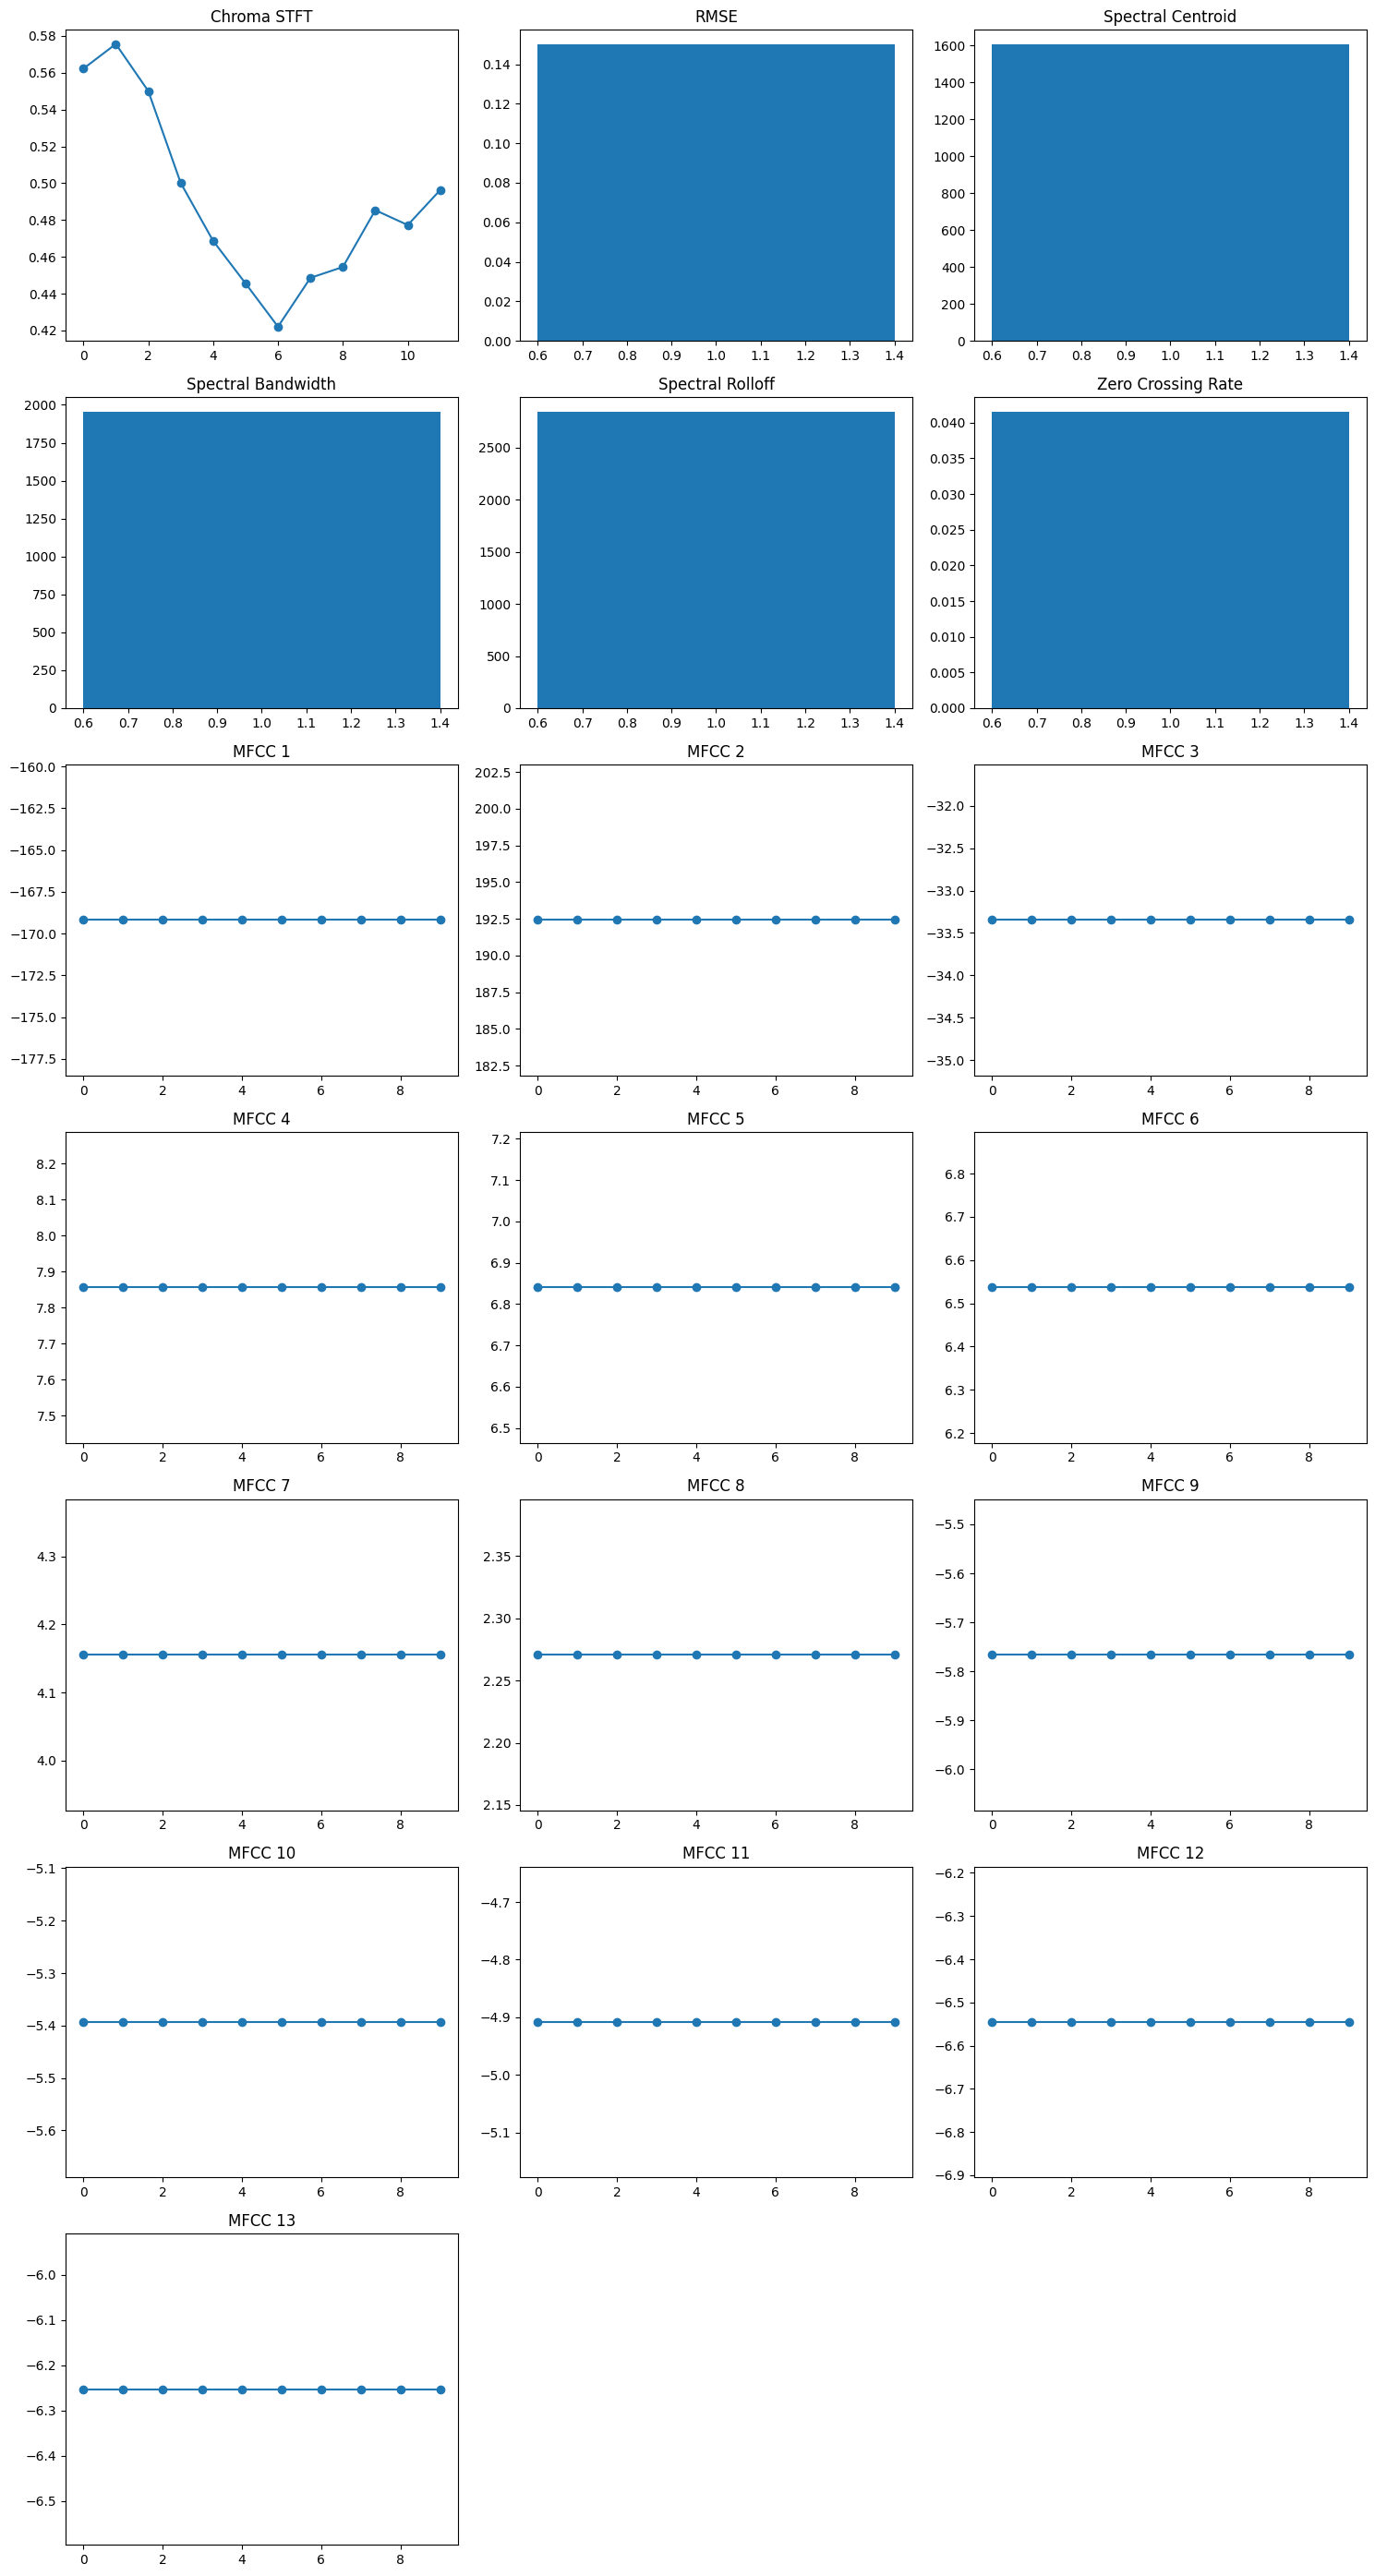

In [ ]:
import librosa
import numpy as np
import os
import json
from pydub import AudioSegment
import matplotlib.pyplot as plt

# Ensure matplotlib inline rendering for notebooks
%matplotlib inline

# Directories
audio_dir = "/content/drive/MyDrive/Datasetr/Dataset/Audio/"
processed_audio_dir = "/content/drive/MyDrive/Datasetr/processed_audio/"
os.makedirs(processed_audio_dir, exist_ok=True)

# Function to process audio and extract features
def process_audio(audio_path, output_path):
    # Convert .mp3 to .wav using pydub
    audio = AudioSegment.from_mp3(audio_path)
    temp_wav_path = audio_path.replace(".mp3", ".wav")
    audio.export(temp_wav_path, format="wav")

    # Load audio file
    y, sr = librosa.load(temp_wav_path, sr=None)

    # Extract features
    features = {
        "chroma_stft": librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1).tolist(),
        "rmse": float(librosa.feature.rms(y=y).mean()),
        "spectral_centroid": float(librosa.feature.spectral_centroid(y=y, sr=sr).mean()),
        "spectral_bandwidth": float(librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()),
        "rolloff": float(librosa.feature.spectral_rolloff(y=y, sr=sr).mean()),
        "zero_crossing_rate": float(librosa.feature.zero_crossing_rate(y).mean()),
        "mfcc": librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1).tolist()
    }

    # Save features as JSON
    with open(output_path, "w") as f:
        json.dump(features, f)

    # Remove temporary .wav file
    os.remove(temp_wav_path)

# Process all audio files
for audio_file in os.listdir(audio_dir):
    if audio_file.endswith(".mp3"):
        audio_path = os.path.join(audio_dir, audio_file)
        output_path = os.path.join(processed_audio_dir, f"{os.path.splitext(audio_file)[0]}.json")
        try:
            process_audio(audio_path, output_path)
        except Exception as e:
            print(f"Error processing {audio_file}: {e}")

# Function to plot audio feature dynamics
def plot_audio_features(processed_audio_dir):
    for json_file in os.listdir(processed_audio_dir):
        if json_file.endswith(".json"):
            json_path = os.path.join(processed_audio_dir, json_file)

            # Load extracted features
            with open(json_path, 'r') as f:
                features = json.load(f)

            print(f"Plotting features for {json_file}...")

            # Set up the number of subplots
            total_subplots = 6 + len(features.get("mfcc", []))
            cols = 3
            rows = (total_subplots // cols) + (total_subplots % cols > 0)

            plt.figure(figsize=(15, rows * 4))

            # Plot individual features
            plt.subplot(rows, cols, 1)
            plt.plot(features.get("chroma_stft", []), marker='o')
            plt.title("Chroma STFT")

            plt.subplot(rows, cols, 2)
            plt.bar([1], [features.get("rmse", 0)])
            plt.title("RMSE")

            plt.subplot(rows, cols, 3)
            plt.bar([1], [features.get("spectral_centroid", 0)])
            plt.title("Spectral Centroid")

            plt.subplot(rows, cols, 4)
            plt.bar([1], [features.get("spectral_bandwidth", 0)])
            plt.title("Spectral Bandwidth")

            plt.subplot(rows, cols, 5)
            plt.bar([1], [features.get("rolloff", 0)])
            plt.title("Spectral Rolloff")

            plt.subplot(rows, cols, 6)
            plt.bar([1], [features.get("zero_crossing_rate", 0)])
            plt.title("Zero Crossing Rate")

            # Plot MFCCs
            for i, mfcc_value in enumerate(features.get("mfcc", []), start=7):
                plt.subplot(rows, cols, i)
                plt.plot([mfcc_value] * 10, marker='o')  # Placeholder for dynamic time series
                plt.title(f"MFCC {i-6}")

            plt.tight_layout()
            plt.show()

# Plot audio feature dynamics
plot_audio_features(processed_audio_dir)
